In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('cleaner_draft_data_10_20.csv')

df = df.sort_values('Unnamed: 0')

In [3]:
df.drop(df.loc[:,df.columns.str.contains('NFL')], axis=1, inplace=True)
df.drop(df.loc[:,df.columns[47:56]], axis=1, inplace=True)
df.drop('Pts', axis=1, inplace=True)
d = {'College/Univ':'College'}
di = {'Unnamed: 0':'index'}
df.rename(d, axis=1, inplace=True)
df.rename(di, axis=1, inplace=True)

df.set_index('index', inplace=True)

In [4]:
df[['Ht', 'Wt', '40yd', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle']] = df.groupby('Pos')['Ht', 'Wt', '40yd', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle'].transform(lambda x: x.fillna(x.mean()))

for i in df.columns[14:]:
    df[i].fillna(0, inplace=True)

<ipython-input-4-c36ec2da6410>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[['Ht', 'Wt', '40yd', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle']] = df.groupby('Pos')['Ht', 'Wt', '40yd', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle'].transform(lambda x: x.fillna(x.mean()))


In [5]:
df['Draft.Yr'] = df['Drafted (tm/rnd/yr)'].str.split('/')
years = []

for index, item in df.iterrows():
    try:
        year = item['Draft.Yr'][-1]
        
    except TypeError:
        year = np.nan
    years.append(year)
    
df['Year'] = years

df['Year'].fillna(method='ffill', inplace=True)
df['Year'] = df['Year'].astype('int64')

df['AV/Yr'] = df['CarAV']/(df['To']-df['Year'] + 1)

    


In [6]:
qbs = df[df['Pos']=='QB']
qbs.drop('Bench', axis=1, inplace=True)
qb_cols = qbs.columns[:7].append(qbs.columns[13:25].append(qbs.columns[46:53].append(qbs.columns[58:59].append(qbs.columns[60:62]))))
qbs = qbs[qb_cols]


C:\Python\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Rating Slope: -0.4999114175423587
Rating Correlation: -0.3220583946967992
Yards Slope: -0.01922176905424245
Yards Correlation: -0.32386478668964624
TDs Slope: -2.503344548467446
TDs Correlation: -0.377963151628429


<Figure size 432x288 with 0 Axes>

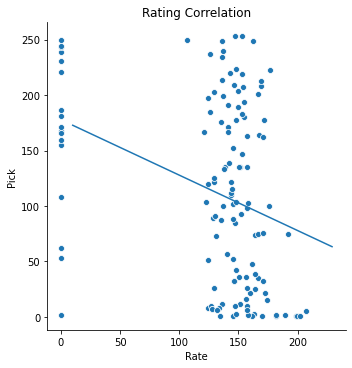

<Figure size 432x288 with 0 Axes>

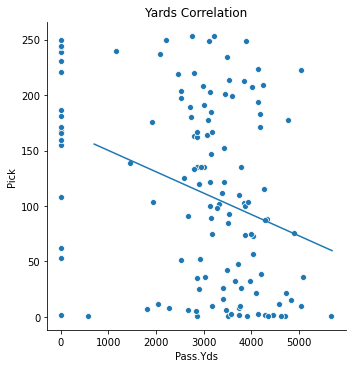

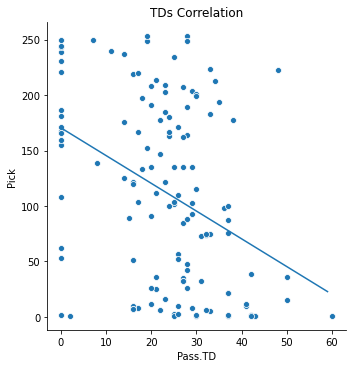

In [7]:
a, b = np.polyfit(qbs['Rate'], qbs['Pick'], 1)
x = np.arange(10, 230)
plt.figure()
sns.relplot(x='Rate', y='Pick', data=qbs)
plt.plot(x, (a*x+b))
print('Rating Slope:', a)
plt.title('Rating Correlation')

r = np.corrcoef(qbs['Rate'], qbs['Pick'])

print('Rating Correlation:', r[0,1])

plt.figure()
sns.relplot(x='Pass.Yds', y='Pick', data=qbs)
a, b = np.polyfit(qbs['Pass.Yds'], qbs['Pick'], 1)
x = np.arange(700, 5700)
plt.plot(x, a*x+b)
plt.title('Yards Correlation')
print('Yards Slope:', a)

r = np.corrcoef(qbs['Pass.Yds'], qbs['Pick'])

print('Yards Correlation:', r[0,1])


sns.relplot(x='Pass.TD', y='Pick', data=qbs)
a, b = np.polyfit(qbs['Pass.TD'], qbs['Pick'], 1)
x = np.arange(0, 60)
plt.plot(x, a*x+b)
plt.title('TDs Correlation')
print('TDs Slope:', a)

r = np.corrcoef(qbs['Pass.TD'], qbs['Pick'])

print('TDs Correlation:', r[0,1])

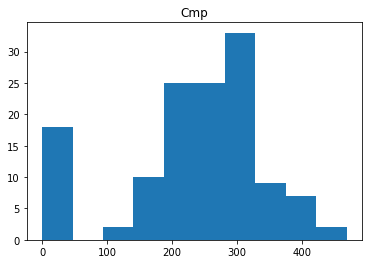

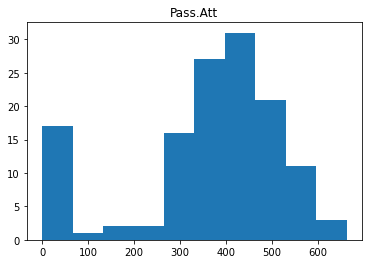

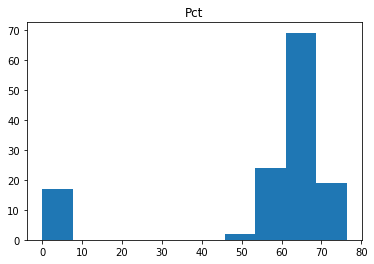

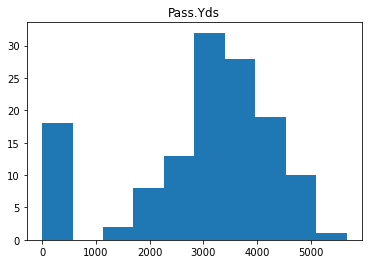

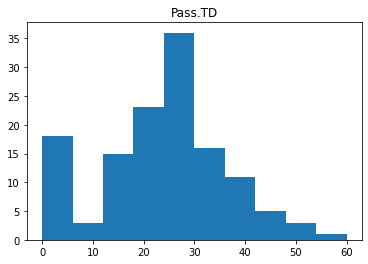

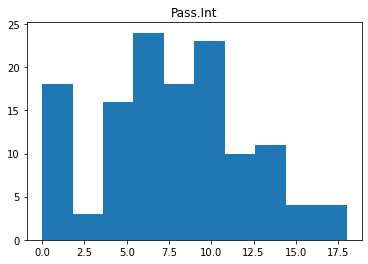

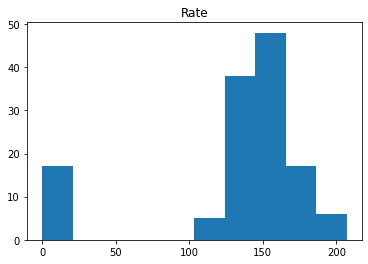

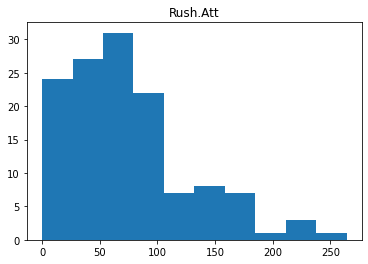

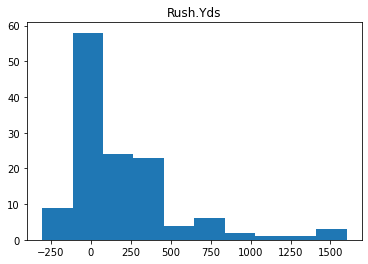

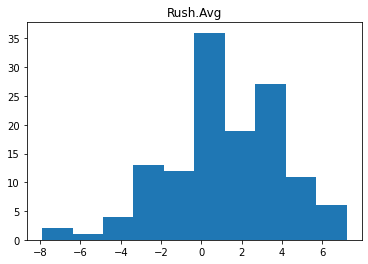

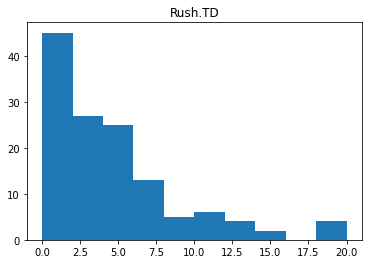

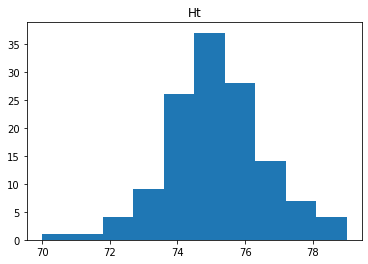

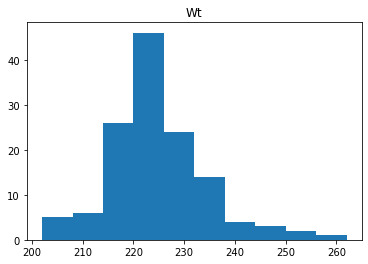

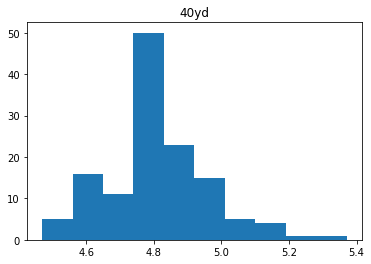

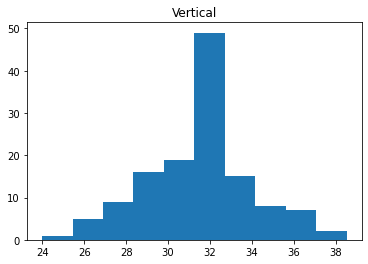

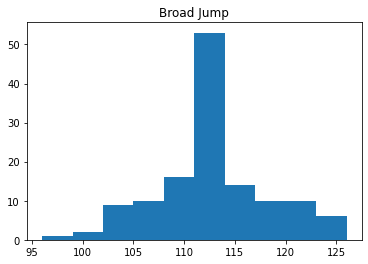

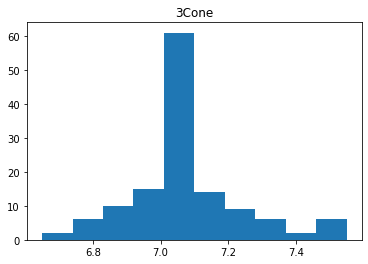

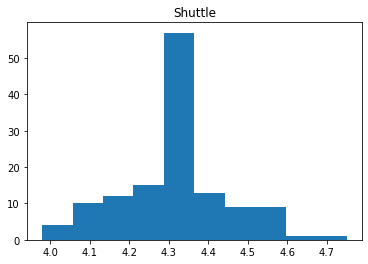

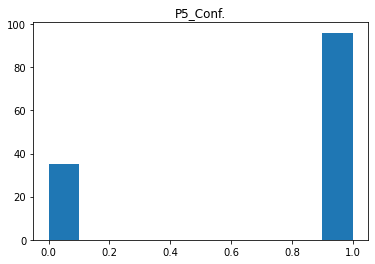

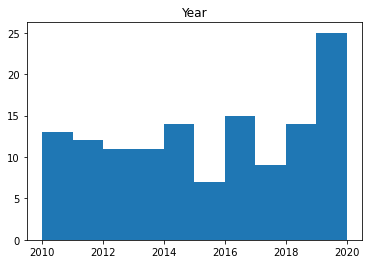

In [8]:
qbs_info = qbs[['Player', 'Pos', 'Year', 'AV/Yr']]

qbs['Rush.TD.Norm'] = np.log1p(qbs['Rush.TD'])
qbs_ml_cols = qbs.columns[8:-2]

for i in qbs_ml_cols:
    plt.figure()
    plt.hist(qbs[i])
    plt.title(i)

Mean Squared Error: 6617.960066900001


,Id,Pick,Player,Pos,Year,AV/Yr
17,2063,40.580,Baker Mayfield,QB,2018,10.333333
15,1052,42.570,Johnny Manziel,QB,2014,2.500000
27,2585,43.710,Joe Burrow,QB,2020,7.000000
36,266,45.210,Blaine Gabbert,QB,2011,1.600000
20,1150,45.430,Logan Thomas,QB,2014,1.000000
9,517,45.580,Robert Griffin III,QB,2012,4.111111
32,257,50.610,Cam Newton,QB,2011,11.100000
19,1244,60.020,Tajh Boyd,QB,2014,NaN
6,1009,68.950,Zac Dysert,QB,2013,0.000000
5,591,73.470,Russell Wilson,QB,2012,13.333333


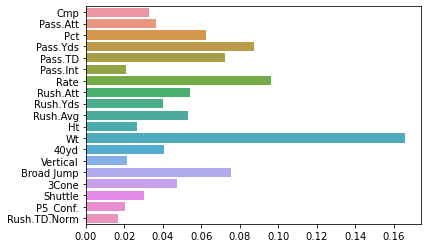

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

rfr = RandomForestRegressor()

X = qbs[qbs.columns[8:]].drop(['Rush.TD', 'Year', 'AV/Yr'], axis=1)
y = qbs['Pick']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = rfr.fit(X_train, y_train)

y_predict = model.predict(X_test)

mse = mean_squared_error(y_test, y_predict)

print('Mean Squared Error:', mse)

output = pd.DataFrame({'Id':X_test.index, 'Pick':y_predict})
output_qb = output.merge(qbs_info, how='left', left_on='Id', right_on=qbs_info.index)


display(output_qb.sort_values('Pick'))

sns.barplot(model.feature_importances_, X.columns)

In [10]:
wrs = df[df['Pos']=='WR']
wr_cols = wrs.columns[:6].append(wrs.columns[13:14].append(wrs.columns[21:29].append(wrs.columns[42:54].append(wrs.columns[55:]))))

wrs = wrs[wr_cols]

Rec. Correlation: -0.3202374571160892
Yards Correlation: -0.3677947191170918
TDs Correlation: -0.34283771191975115
40yd Correlation: 0.1298623644870119


<Figure size 432x288 with 0 Axes>

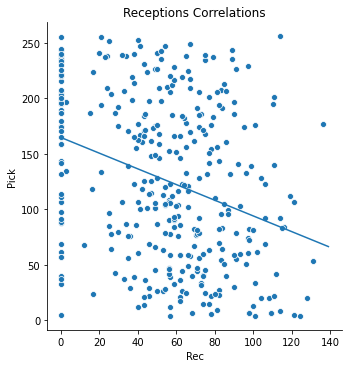

<Figure size 432x288 with 0 Axes>

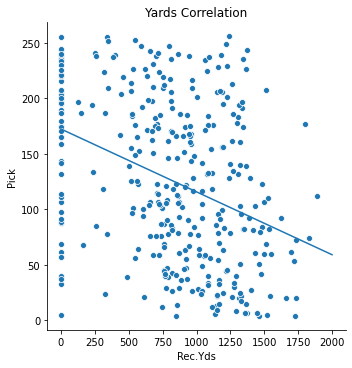

<Figure size 432x288 with 0 Axes>

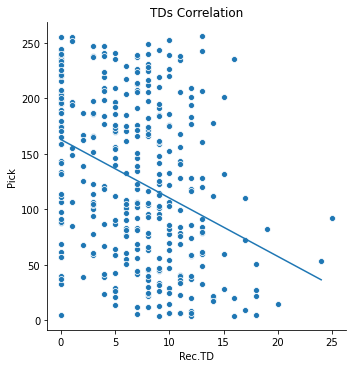

<Figure size 432x288 with 0 Axes>

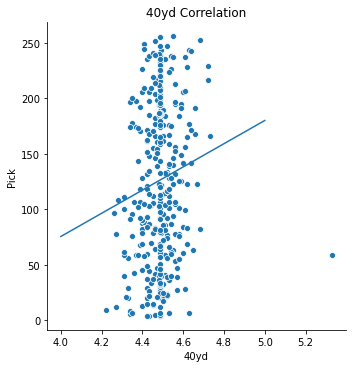

In [11]:
plt.figure()
sns.relplot(x='Rec', y='Pick', data=wrs, kind='scatter')
a, b = np.polyfit(wrs['Rec'], wrs['Pick'], 1)
x = np.arange(0, 140)
plt.plot(x, a*x+b)
plt.title('Receptions Correlations')

r = np.corrcoef(wrs['Rec'], wrs['Pick'])
print('Rec. Correlation:', r[0,1])

plt.figure()
sns.relplot(x='Rec.Yds', y='Pick', data=wrs, kind='scatter')
a, b = np.polyfit(wrs['Rec.Yds'], wrs['Pick'], 1)
x = np.arange(0, 2000)
plt.plot(x, a*x+b)
plt.title('Yards Correlation')

r = np.corrcoef(wrs['Rec.Yds'], wrs['Pick'])
print('Yards Correlation:', r[0,1])

plt.figure()
sns.relplot(x='Rec.TD', y='Pick', data=wrs, kind='scatter')
a, b = np.polyfit(wrs['Rec.TD'], wrs['Pick'], 1)
x = np.arange(0, 25)
plt.plot(x, a*x+b)
plt.title('TDs Correlation')

r = np.corrcoef(wrs['Rec.TD'], wrs['Pick'])
print('TDs Correlation:', r[0,1])

plt.figure()
sns.relplot(x='40yd', y='Pick', data=wrs, kind='scatter')
a, b = np.polyfit(wrs['40yd'], wrs['Pick'], 1)
x = np.linspace(4, 5, 50)
plt.plot(x, a*x+b)
plt.title('40yd Correlation')

r = np.corrcoef(wrs['40yd'], wrs['Pick'])
print('40yd Correlation:', r[0,1])

<ipython-input-12-15034275ed73>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
C:\Python\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6630: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
C:\Python\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6631: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


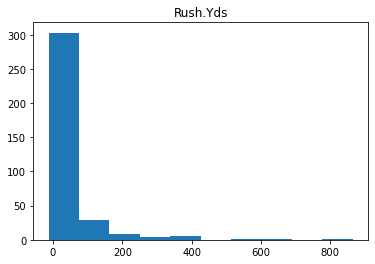

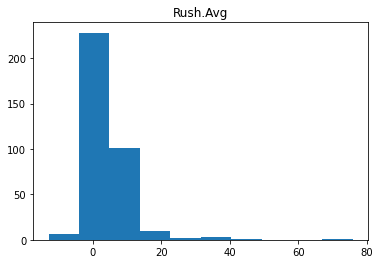

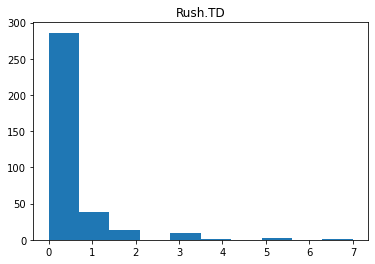

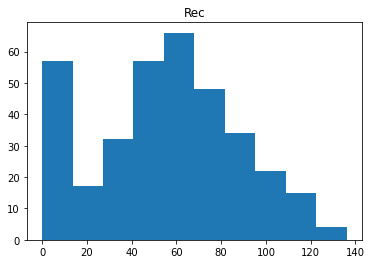

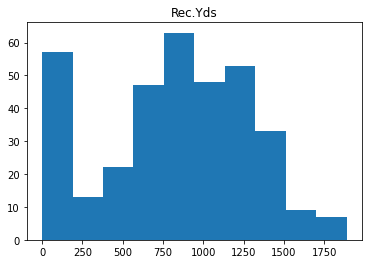

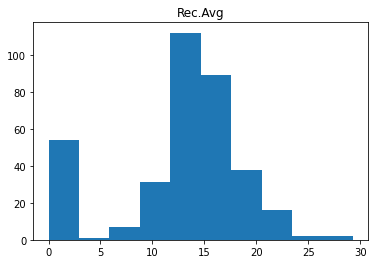

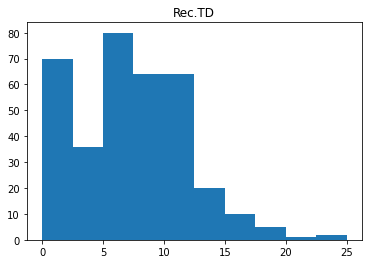

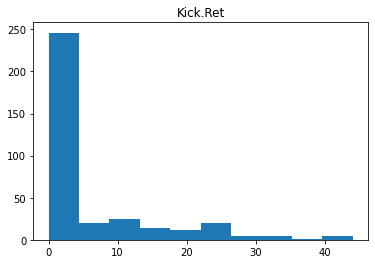

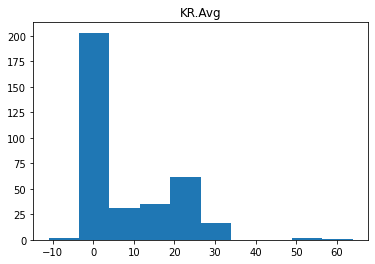

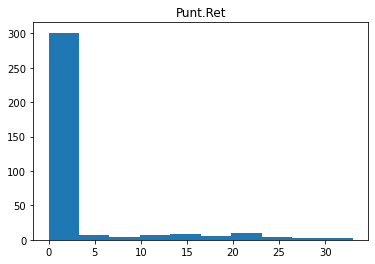

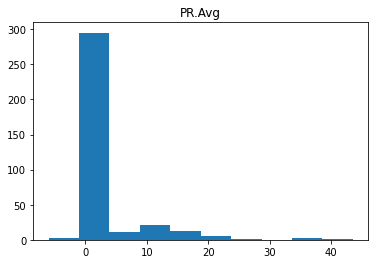

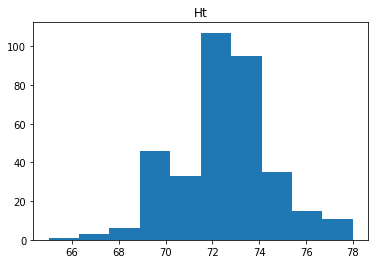

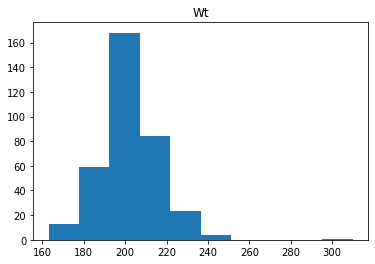

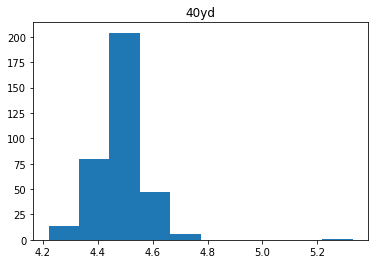

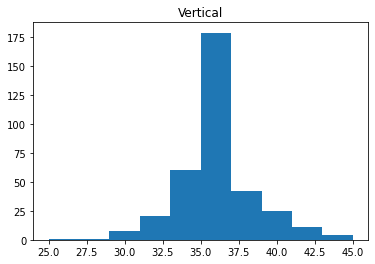

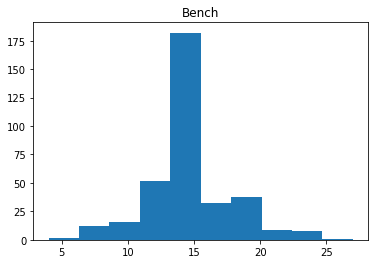

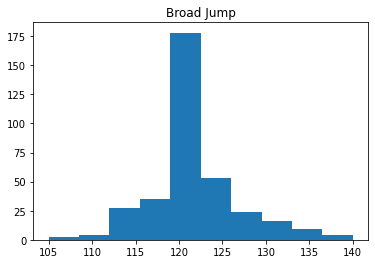

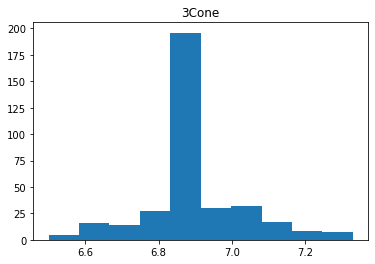

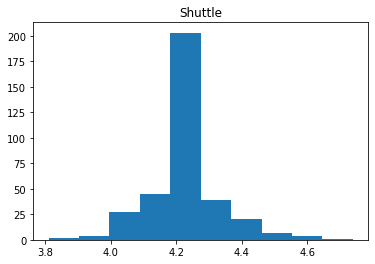

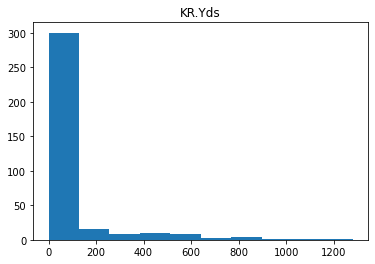

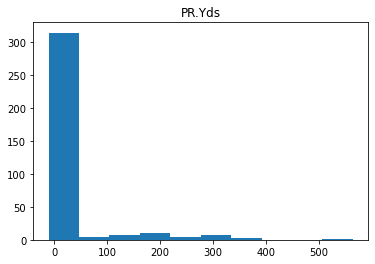

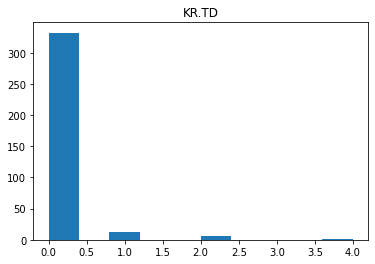

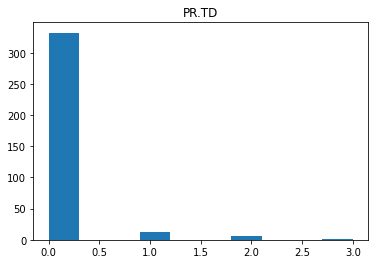

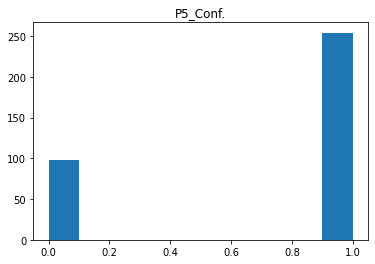

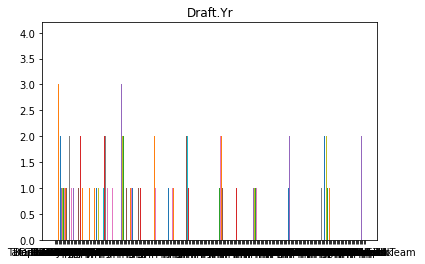

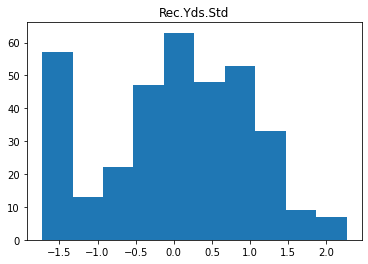

In [12]:
wrs_info = wrs[['Player', 'Pos', 'Year', 'AV/Yr']]
wrs['Rec.Yds.Std'] = (wrs['Rec.Yds'] - wrs['Rec.Yds'].mean())/np.std(wrs['Rec.Yds'])

for i in wrs.columns[8:-3].append(wrs.columns[-1:]):
    plt.figure()
    plt.hist(wrs[i])
    plt.title(i)

Mean Squared Error: 4383.768594149854


,Id,Pick,Player,Pos,Year,AV/Yr
68,1561,58.27,Corey Coleman,WR,2016,2.000000
43,1815,61.39,John Ross,WR,2017,1.250000
34,438,69.40,Aldrick Robinson,WR,2011,1.500000
38,1813,73.31,Mike Williams,WR,2017,5.000000
79,1291,73.73,Amari Cooper,WR,2015,7.500000
45,1033,76.99,Sammy Watkins,WR,2014,5.571429
90,558,79.14,Stephen Hill,WR,2012,1.333333
69,535,79.20,Kendall Wright,WR,2012,4.666667
37,1635,81.52,Leonte Carroo,WR,2016,0.666667
60,843,84.90,Terrance Williams,WR,2013,4.666667


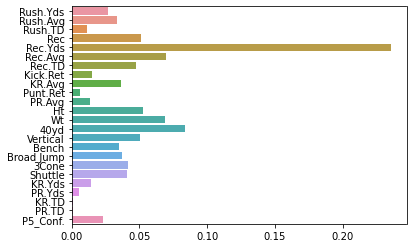

In [13]:
rfr = RandomForestRegressor()

X = wrs[wrs.columns[8:-4]]
y = wrs['Pick']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = rfr.fit(X_train, y_train)

y_predict = model.predict(X_test)

mse = mean_squared_error(y_test, y_predict)

print('Mean Squared Error:', mse)

output = pd.DataFrame({'Id':X_test.index, 'Pick':y_predict})
output_wr = output.merge(wrs_info, how='left', left_on='Id', right_on=wrs_info.index)


display(output_wr.sort_values('Pick').head(20))

sns.barplot(model.feature_importances_, X.columns)

Mean Squared Error: 4111.189426357066


,Id,Pick,Player,Pos,Year,AV/Yr
43,1815,64.73,John Ross,WR,2017,1.250000
34,438,67.30,Aldrick Robinson,WR,2011,1.500000
45,1033,67.64,Sammy Watkins,WR,2014,5.571429
68,1561,68.33,Corey Coleman,WR,2016,2.000000
79,1291,70.37,Amari Cooper,WR,2015,7.500000
38,1813,71.82,Mike Williams,WR,2017,5.000000
69,535,76.84,Kendall Wright,WR,2012,4.666667
21,2596,77.34,Henry Ruggs III,WR,2020,4.000000
90,558,77.92,Stephen Hill,WR,2012,1.333333
80,2384,79.95,Parris Campbell,WR,2019,1.000000


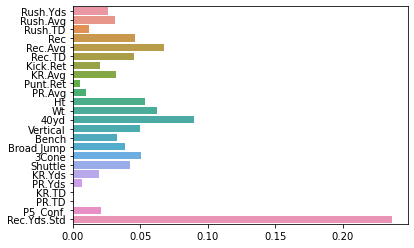

In [14]:
rfr = RandomForestRegressor()

X = wrs[wrs.columns[8:-4].append(wrs.columns[-1:])].drop('Rec.Yds', axis=1)
y = wrs['Pick']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = rfr.fit(X_train, y_train)

y_predict = model.predict(X_test)

mse = mean_squared_error(y_test, y_predict)

print('Mean Squared Error:', mse)

output = pd.DataFrame({'Id':X_test.index, 'Pick':y_predict})
output_wr = output.merge(wrs_info, how='left', left_on='Id', right_on=wrs_info.index)


display(output_wr.sort_values('Pick').head(20))

sns.barplot(model.feature_importances_, X.columns)

Mean Squared Error: 4172.857869606601


,Id,Pick,Player,Pos,Year,AV/Yr
43,1815,57.03,John Ross,WR,2017,1.250000
68,1561,62.90,Corey Coleman,WR,2016,2.000000
38,1813,64.54,Mike Williams,WR,2017,5.000000
34,438,72.63,Aldrick Robinson,WR,2011,1.500000
45,1033,72.73,Sammy Watkins,WR,2014,5.571429
10,2712,76.95,Gabriel Davis,WR,2020,6.000000
79,1291,77.44,Amari Cooper,WR,2015,7.500000
28,634,87.17,Jarius Wright,WR,2012,2.875000
80,2384,88.71,Parris Campbell,WR,2019,1.000000
73,612,89.35,Chris Givens,WR,2012,3.000000


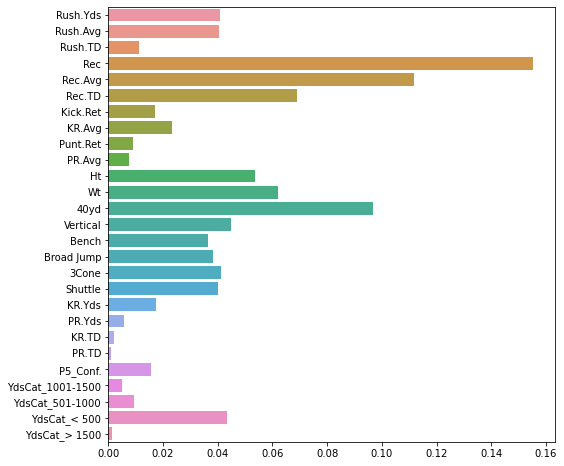

In [15]:
wrs.loc[wrs['Rec.Yds'] <= 500, 'YdsCat'] = '< 500'
wrs.loc[(wrs['Rec.Yds'] > 500) & (wrs['Rec.Yds'] <=1000), 'YdsCat'] = '501-1000'
wrs.loc[(wrs['Rec.Yds'] > 1000) & (wrs['Rec.Yds'] <=1500), 'YdsCat'] = '1001-1500'
wrs.loc[(wrs['Rec.Yds'] > 1500), 'YdsCat'] = '> 1500'

rfr = RandomForestRegressor()

X = wrs[wrs.columns[8:-5].append(wrs.columns[-1:])].drop('Rec.Yds', axis=1)
X = pd.get_dummies(X)
y = wrs['Pick']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = rfr.fit(X_train, y_train)

y_predict = model.predict(X_test)

mse = mean_squared_error(y_test, y_predict)

print('Mean Squared Error:', mse)

output = pd.DataFrame({'Id':X_test.index, 'Pick':y_predict})
output_wr = output.merge(wrs_info, how='left', left_on='Id', right_on=wrs_info.index)


display(output_wr.sort_values('Pick').head(20))

plt.figure(figsize=(8, 8))
sns.barplot(model.feature_importances_, X.columns)

In [16]:
rbs = df[df['Pos']=='RB']
rb_cols = rbs.columns[:6].append(rbs.columns[13:14].append(rbs.columns[21:29].append(rbs.columns[42:54].append(rbs.columns[55:]))))

rbs = rbs[rb_cols]

Yards Correlation: -0.3966652705556086
Y/A Correlation: -0.05211644484186635
TDs Correlation: -0.4469206359246293


<Figure size 432x288 with 0 Axes>

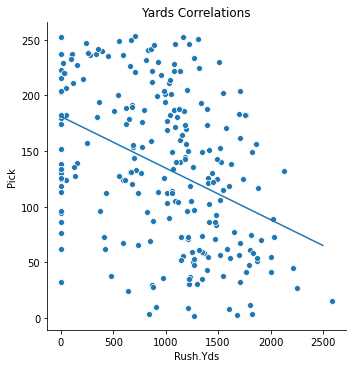

<Figure size 432x288 with 0 Axes>

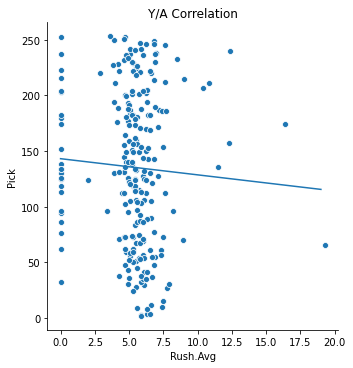

<Figure size 432x288 with 0 Axes>

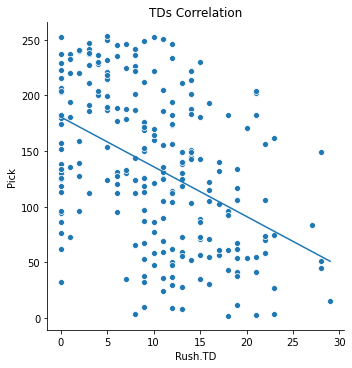

In [17]:
plt.figure()
sns.relplot(x='Rush.Yds', y='Pick', data=rbs, kind='scatter')
a, b = np.polyfit(rbs['Rush.Yds'], rbs['Pick'], 1)
x = np.arange(0, 2500)
plt.plot(x, a*x+b)
plt.title('Yards Correlations')

r = np.corrcoef(rbs['Rush.Yds'], rbs['Pick'])
print('Yards Correlation:', r[0,1])

plt.figure()
sns.relplot(x='Rush.Avg', y='Pick', data=rbs, kind='scatter')
a, b = np.polyfit(rbs['Rush.Avg'], rbs['Pick'], 1)
x = np.arange(0, 20)
plt.plot(x, a*x+b)
plt.title('Y/A Correlation')

r = np.corrcoef(rbs['Rush.Avg'], rbs['Pick'])
print('Y/A Correlation:', r[0,1])

plt.figure()
sns.relplot(x='Rush.TD', y='Pick', data=rbs, kind='scatter')
a, b = np.polyfit(rbs['Rush.TD'], rbs['Pick'], 1)
x = np.arange(0, 30)
plt.plot(x, a*x+b)
plt.title('TDs Correlation')

r = np.corrcoef(rbs['Rush.TD'], rbs['Pick'])
print('TDs Correlation:', r[0,1])

<ipython-input-18-f4d43a53bec9>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


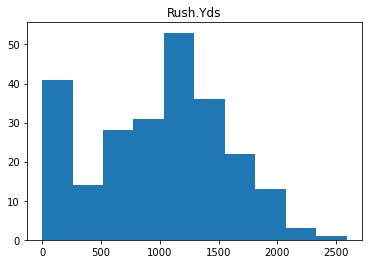

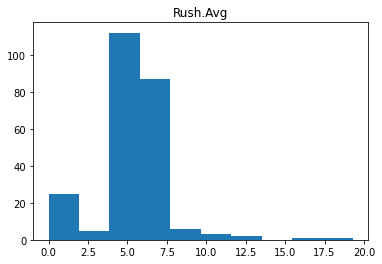

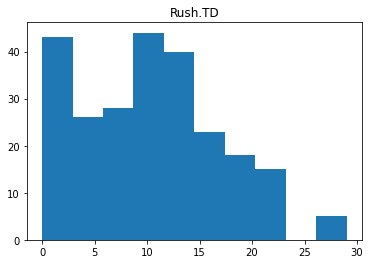

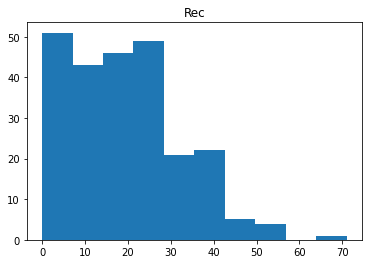

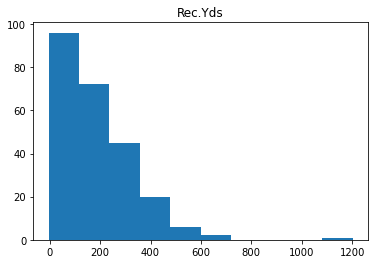

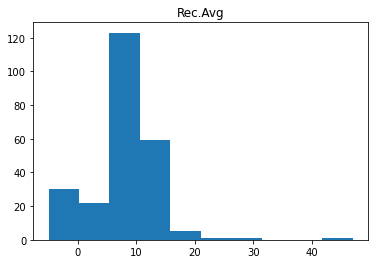

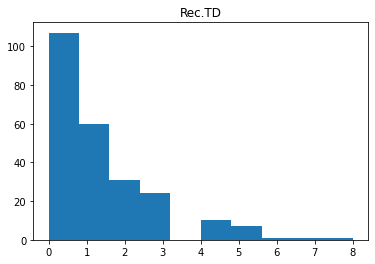

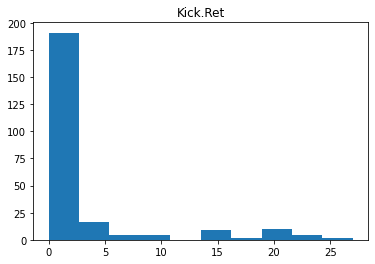

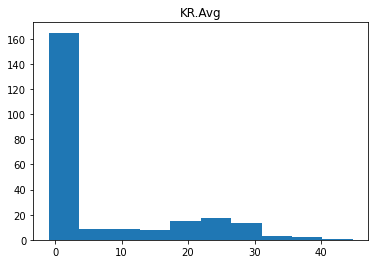

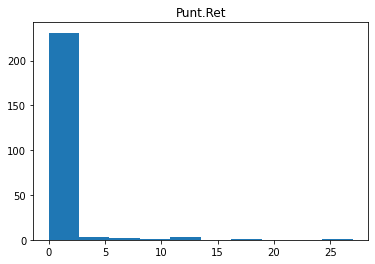

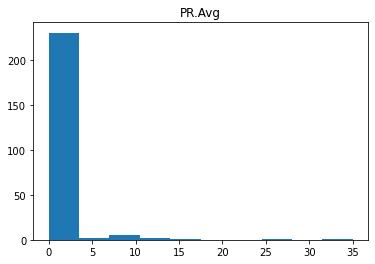

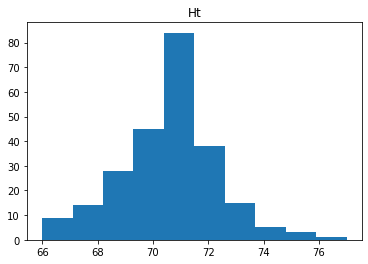

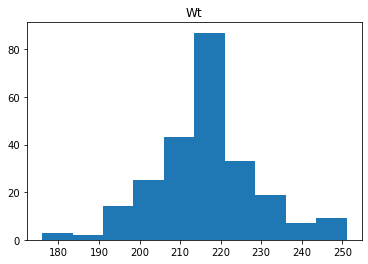

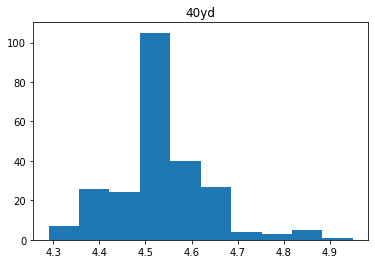

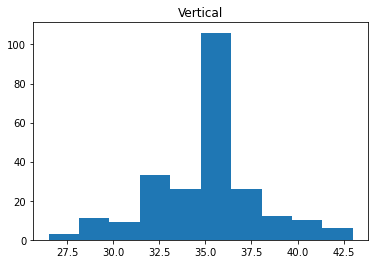

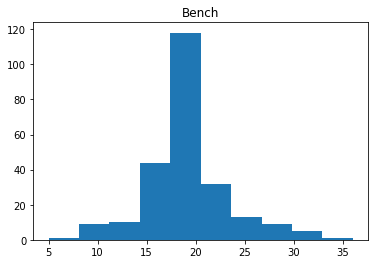

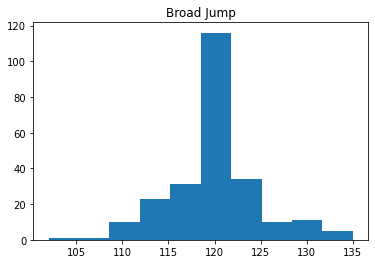

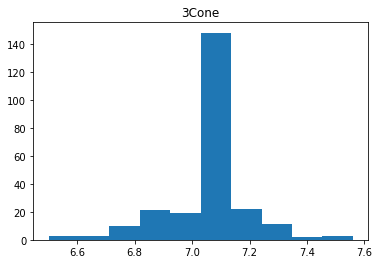

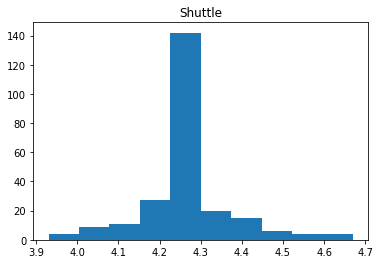

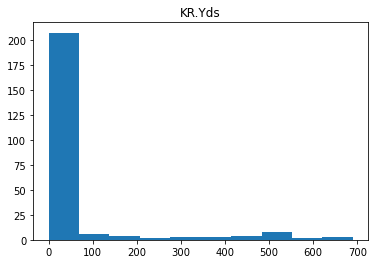

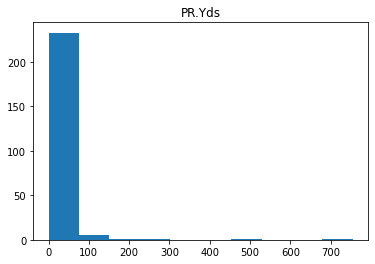

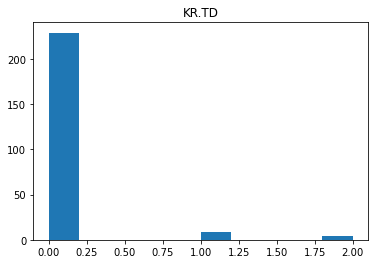

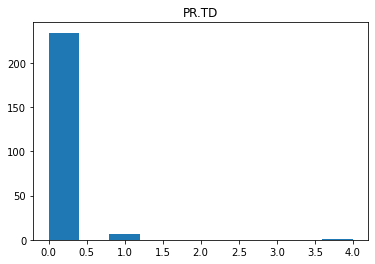

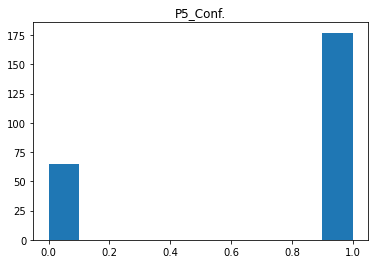

In [18]:
rbs_info = rbs[['Player', 'Pos', 'Year', 'AV/Yr']]

for i in rbs.columns[8:-3]:
    plt.figure()
    plt.hist(rbs[i])
    plt.title(i)

In [19]:
rbs.columns

Index(['Rnd', 'Pick', 'Tm', 'Player', 'Pos', 'Age', 'College', 'Rush.Att',
       'Rush.Yds', 'Rush.Avg', 'Rush.TD', 'Rec', 'Rec.Yds', 'Rec.Avg',
       'Rec.TD', 'Kick.Ret', 'KR.Avg', 'Punt.Ret', 'PR.Avg', 'Ht', 'Wt',
       '40yd', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', 'KR.Yds',
       'PR.Yds', 'KR.TD', 'PR.TD', 'P5_Conf.', 'Draft.Yr', 'Year', 'AV/Yr'],
      dtype='object')

Mean Squared Error: 4251.747956391193


,Id,Pick,Player,Pos,Year,AV/Yr
62,518,74.81,Trent Richardson,RB,2012,5.666667
3,2102,82.20,Ronald Jones II,RB,2018,5.000000
48,58,86.30,Montario Hardesty,RB,2010,1.333333
5,546,89.91,Doug Martin,RB,2012,5.571429
34,1154,94.61,DeAnthony Thomas,RB,2014,1.000000
12,2457,95.37,Tony Pollard,RB,2019,4.000000
55,11,96.02,Ryan Mathews,RB,2010,6.142857
15,1438,99.19,Jay Ajayi,RB,2015,3.800000
27,728,107.15,Michael Smith,RB,2012,0.000000
47,2058,107.36,Chris Carson,RB,2017,7.000000


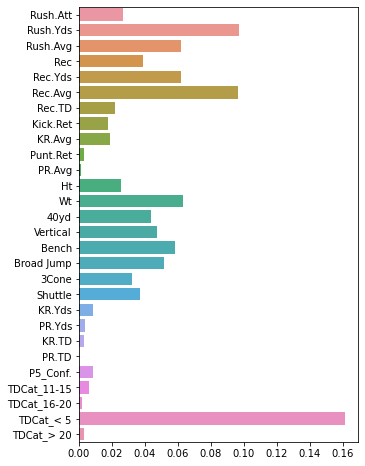

In [20]:
rbs.loc[rbs['Rush.TD'] <= 5, 'TDCat'] = '< 5'
rbs.loc[(rbs['Rush.TD'] > 5) & (rbs['Rush.TD'] <=1), 'TDCat'] = '6-10'
rbs.loc[(rbs['Rush.TD'] > 10) & (rbs['Rush.TD'] <=15), 'TDCat'] = '11-15'
rbs.loc[(rbs['Rush.TD'] > 15) & (rbs['Rush.TD'] <=20), 'TDCat'] = '16-20'
rbs.loc[(rbs['Rush.TD'] > 20), 'TDCat'] = '> 20'

rfr = RandomForestRegressor()

X = rbs[rbs.columns[7:-4].append(rbs.columns[-1:])].drop('Rush.TD', axis=1)
X = pd.get_dummies(X)
y = rbs['Pick']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

model = rfr.fit(X_train, y_train)

y_predict = model.predict(X_test)

mse = mean_squared_error(y_test, y_predict)

print('Mean Squared Error:', mse)

output = pd.DataFrame({'Id':X_test.index, 'Pick':y_predict})
output_rb = output.merge(rbs_info, how='left', left_on='Id', right_on=rbs_info.index)


display(output_rb.sort_values('Pick').head(20))

plt.figure(figsize=(5, 8))
sns.barplot(model.feature_importances_, X.columns)

In [21]:
tes = df[df['Pos']=='TE']
te_cols = tes.columns[:6].append(tes.columns[13:14].append(tes.columns[21:29].append(tes.columns[42:54].append(tes.columns[55:]))))
tes = tes[te_cols]


Rec. Correlation: -0.3625906808449625
Yards Correlation: -0.4012902912467998
TDs Correlation: -0.3191700372510339
Wt Correlation: -0.12444716887939174


<Figure size 432x288 with 0 Axes>

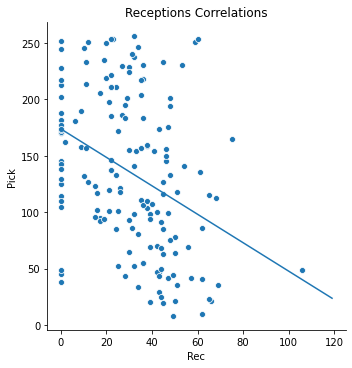

<Figure size 432x288 with 0 Axes>

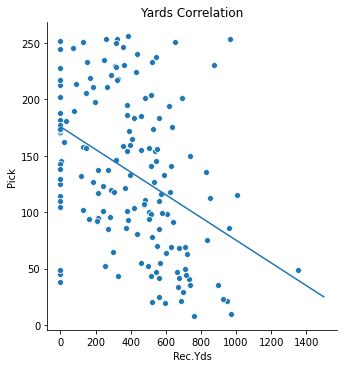

<Figure size 432x288 with 0 Axes>

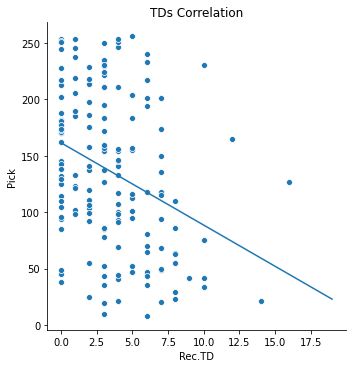

<Figure size 432x288 with 0 Axes>

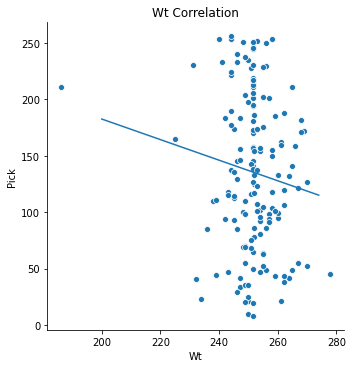

In [22]:
plt.figure()
sns.relplot(x='Rec', y='Pick', data=tes, kind='scatter')
a, b = np.polyfit(tes['Rec'], tes['Pick'], 1)
x = np.arange(0, 120)
plt.plot(x, a*x+b)
plt.title('Receptions Correlations')

r = np.corrcoef(tes['Rec'], tes['Pick'])
print('Rec. Correlation:', r[0,1])

plt.figure()
sns.relplot(x='Rec.Yds', y='Pick', data=tes, kind='scatter')
a, b = np.polyfit(tes['Rec.Yds'], tes['Pick'], 1)
x = np.arange(0, 1500)
plt.plot(x, a*x+b)
plt.title('Yards Correlation')

r = np.corrcoef(tes['Rec.Yds'], tes['Pick'])
print('Yards Correlation:', r[0,1])

plt.figure()
sns.relplot(x='Rec.TD', y='Pick', data=tes, kind='scatter')
a, b = np.polyfit(tes['Rec.TD'], tes['Pick'], 1)
x = np.arange(0, 20)
plt.plot(x, a*x+b)
plt.title('TDs Correlation')

r = np.corrcoef(tes['Rec.TD'], tes['Pick'])
print('TDs Correlation:', r[0,1])

plt.figure()
sns.relplot(x='Wt', y='Pick', data=tes, kind='scatter')
a, b = np.polyfit(tes['Wt'], tes['Pick'], 1)
x = np.arange(200, 275)
plt.plot(x, a*x+b)
plt.title('Wt Correlation')

r = np.corrcoef(tes['Wt'], tes['Pick'])
print('Wt Correlation:', r[0,1])

<ipython-input-23-5aba528cc406>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
C:\Python\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6630: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
C:\Python\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6631: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


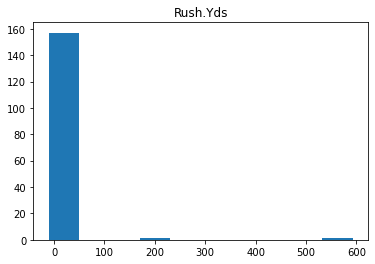

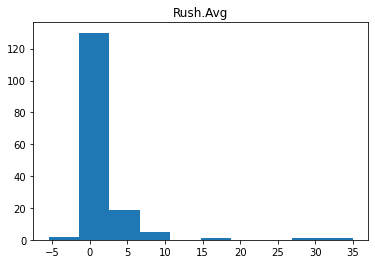

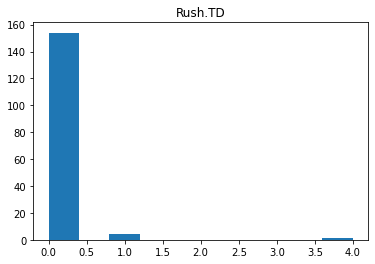

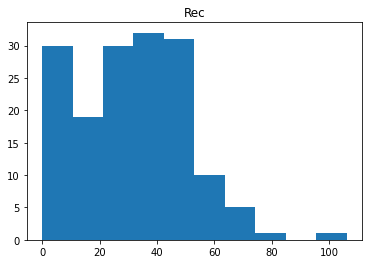

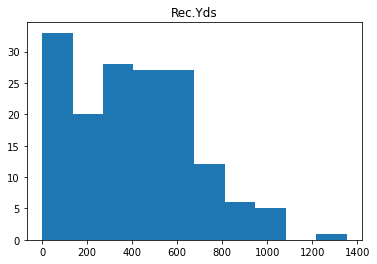

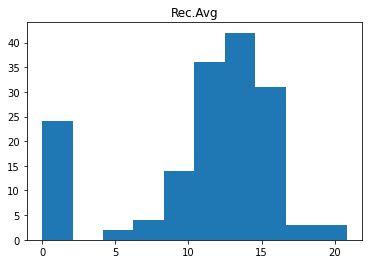

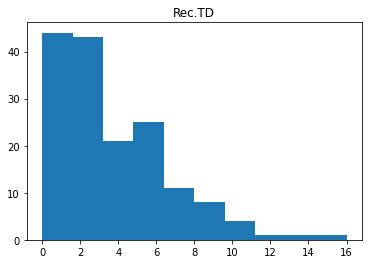

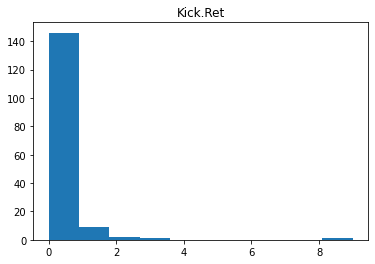

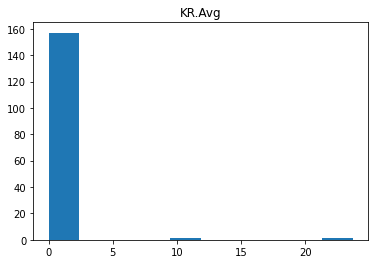

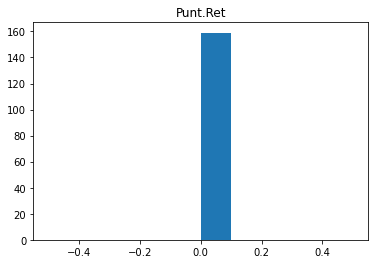

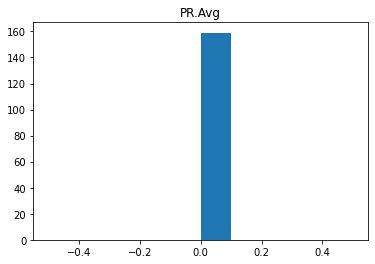

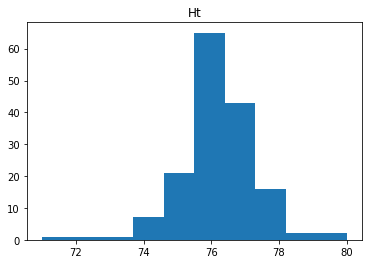

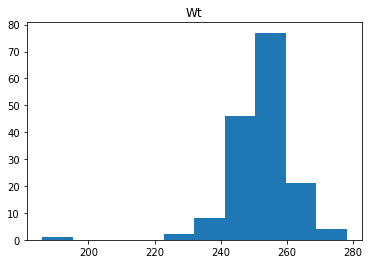

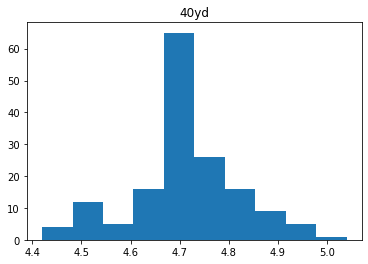

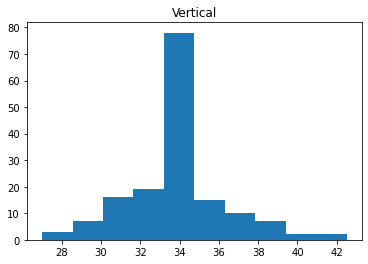

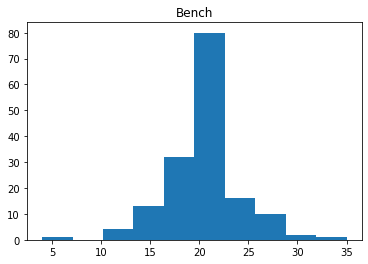

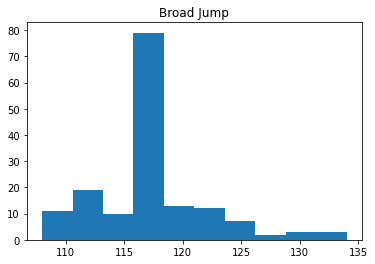

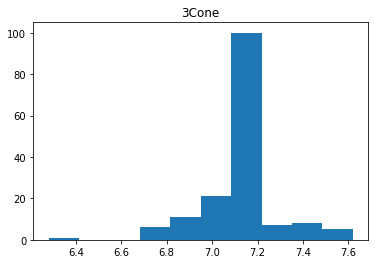

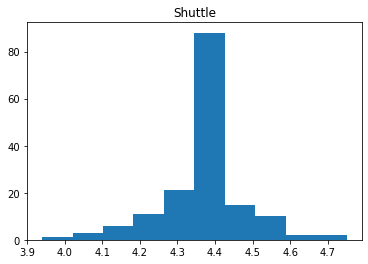

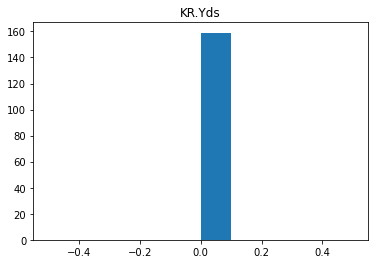

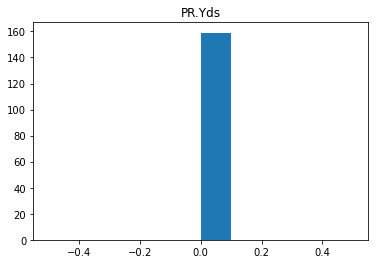

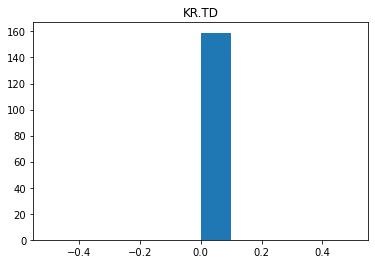

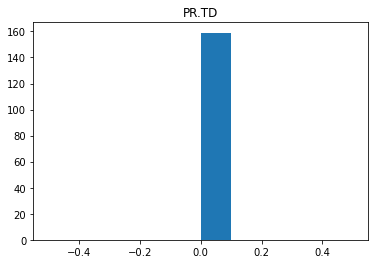

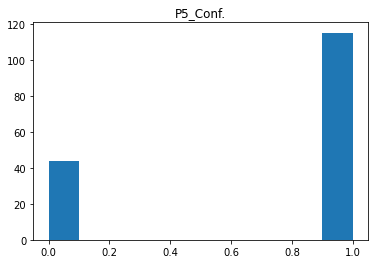

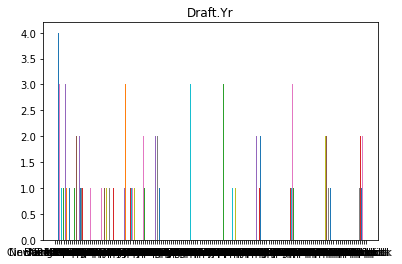

In [23]:
tes_info = tes[['Player', 'Pos', 'Year', 'AV/Yr']]

for i in tes.columns[8:-2]:
    plt.figure()
    plt.hist(tes[i])
    plt.title(i)

Mean Squared Error: 4550.348488189029


,Id,Pick,Player,Pos,Year,AV/Yr
43,1039,85.860000,Eric Ebron,TE,2014,3.857143
42,2150,87.660000,Mark Andrews,TE,2018,8.000000
17,41,89.830000,Rob Gronkowski,TE,2010,6.636364
40,1356,96.480000,Clive Walford,TE,2015,1.400000
44,1835,99.000000,David Njoku,TE,2017,2.250000
21,1739,101.366500,David Morgan,TE,2016,0.333333
24,327,103.140000,Rob Housler,TE,2011,1.800000
35,70,114.010000,Ed Dickson,TE,2010,1.777778
7,155,114.900000,Andrew Quarless,TE,2010,1.500000
29,2627,116.820000,Cole Kmet,TE,2020,2.000000


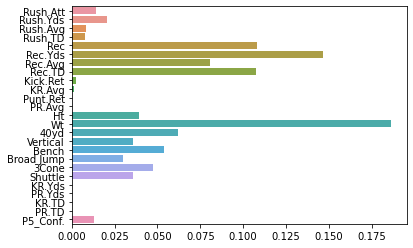

In [24]:
rfr = RandomForestRegressor()

X = tes[tes.columns[7:-3]] 
X = pd.get_dummies(X)
y = tes['Pick']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

model = rfr.fit(X_train, y_train)

y_predict = model.predict(X_test)

mse = mean_squared_error(y_test, y_predict)

print('Mean Squared Error:', mse)

output = pd.DataFrame({'Id':X_test.index, 'Pick':y_predict})
output_te = output.merge(tes_info, how='left', left_on='Id', right_on=tes_info.index)


display(output_te.sort_values('Pick'))

sns.barplot(model.feature_importances_, X.columns)

In [25]:
off_output = pd.concat([output_qb, output_rb, output_te, output_wr])

off_output.sort_values('Pick').head(20)

,Id,Pick,Player,Pos,Year,AV/Yr
17,2063,40.58,Baker Mayfield,QB,2018,10.333333
15,1052,42.57,Johnny Manziel,QB,2014,2.500000
27,2585,43.71,Joe Burrow,QB,2020,7.000000
36,266,45.21,Blaine Gabbert,QB,2011,1.600000
20,1150,45.43,Logan Thomas,QB,2014,1.000000
9,517,45.58,Robert Griffin III,QB,2012,4.111111
32,257,50.61,Cam Newton,QB,2011,11.100000
43,1815,57.03,John Ross,WR,2017,1.250000
19,1244,60.02,Tajh Boyd,QB,2014,NaN
68,1561,62.90,Corey Coleman,WR,2016,2.000000


In [26]:
off_output.groupby(['Year', 'Pos']).agg({'Pick':'mean'})

Pick
Year Pos            
2010 QB   138.576500
     RB   133.397304
     TE   106.246667
     WR   129.515355
2011 QB    89.800000
     RB   142.086000
     TE   125.881028
     WR   130.333981
2012 QB    81.430000
     RB   130.800667
     TE   178.375802
     WR   112.011507
2013 QB   112.253333
     RB   146.725000
     TE   153.566252
     WR   116.947778
2014 QB    93.254667
     RB   141.342933
     TE   127.270000
     WR   122.559078
2015 QB   116.665000
     RB   134.344583
     TE   178.270042
     WR   148.322547
2016 QB   127.580000
     RB   162.804067
     TE   126.435601
     WR   134.121029
2017 QB   142.600000
     RB   122.189874
     TE   130.017500
     WR   119.780966
2018 QB   125.853429
     RB   126.413750
     TE   142.506667
     WR   119.096667
2019 RB   138.851333
     TE   147.530000
     WR   143.649536
2020 QB   108.022500
     RB   162.728819
     TE   141.654726
     WR   113.842524

In [27]:
off_output['Year'] = off_output['Year'].astype('int64')
df_2019 = off_output[off_output['Year']== 2019]

df_2019.sort_values('Pick').head(20)

,Id,Pick,Player,Pos,Year,AV/Yr
80,2384,88.710000,Parris Campbell,WR,2019,1.0
12,2457,95.370000,Tony Pollard,RB,2019,4.0
23,2392,103.500000,Diontae Johnson,WR,2019,6.5
72,2500,116.490000,Darius Slayton,WR,2019,5.5
67,2442,132.730000,Justice Hill,RB,2019,2.0
57,2544,138.370000,Darwin Thompson,RB,2019,1.0
64,2469,140.780000,Ryquell Armstead,RB,2019,2.0
37,2413,144.200000,Kahale Warring,TE,2019,0.0
18,2399,149.410000,David Montgomery,RB,2019,7.5
28,2377,150.860000,Drew Sample,TE,2019,1.0


In [28]:
db_pos = ['DB', 'CB', 'S']
dbs = df[df.Pos.str.startswith(tuple(db_pos))]

dbs_col = dbs.columns[:6].append(dbs.columns[13:14].append(dbs.columns[29:54].append(dbs.columns[55:60].append(dbs.columns[61:]))))

dbs = dbs[dbs_col]

<ipython-input-29-f0fd176d89a5>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


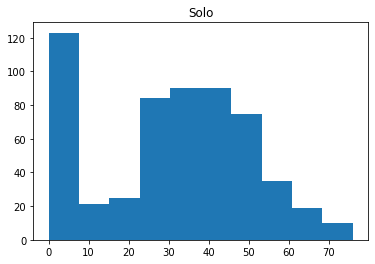

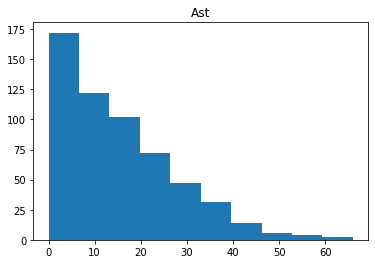

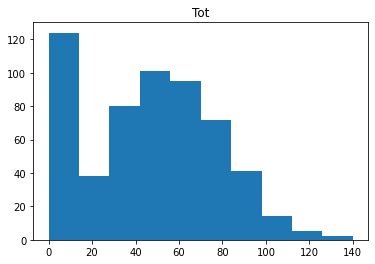

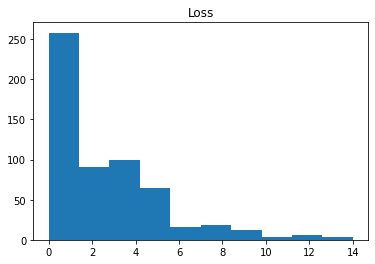

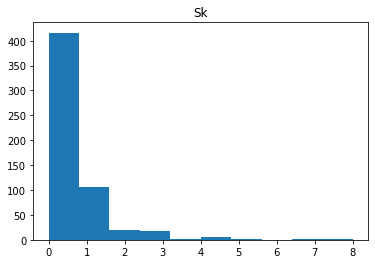

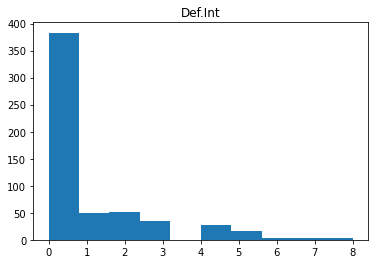

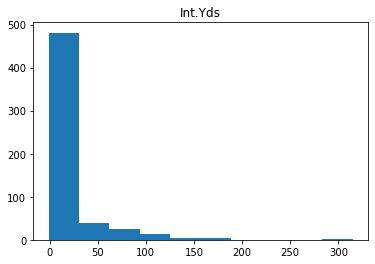

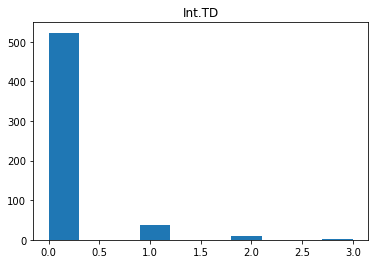

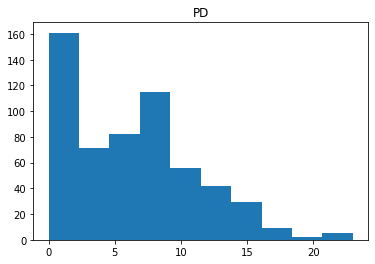

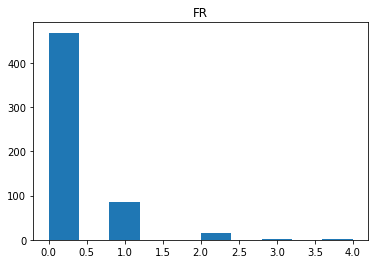

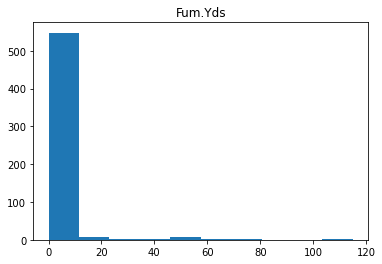

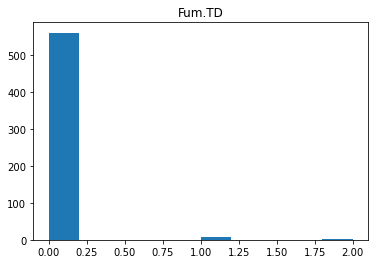

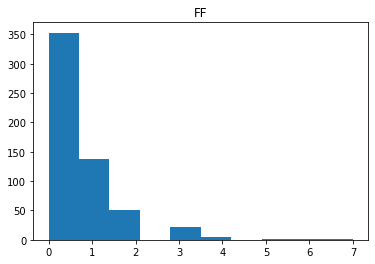

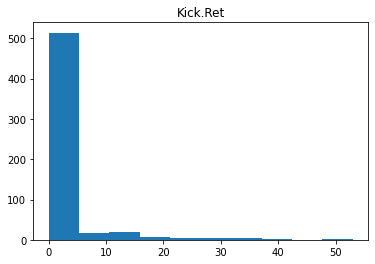

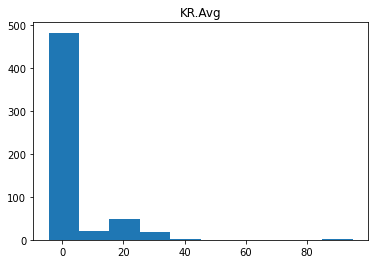

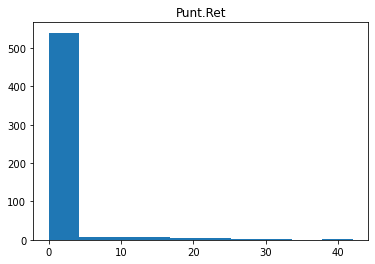

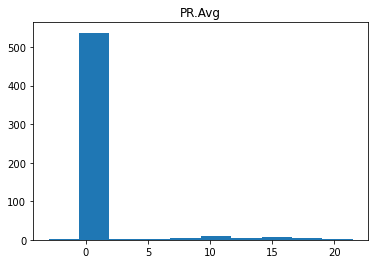

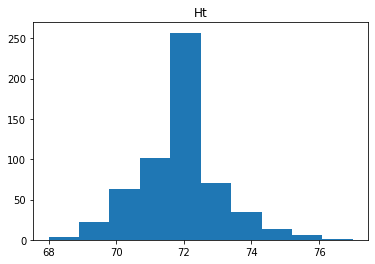

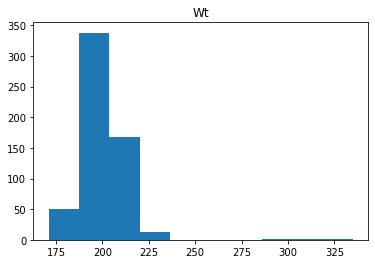

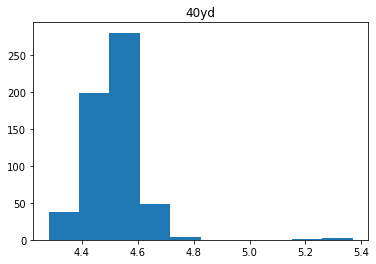

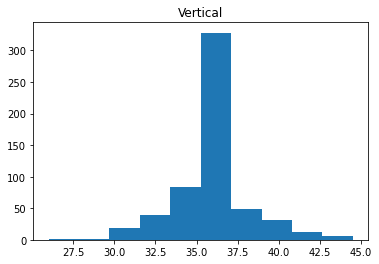

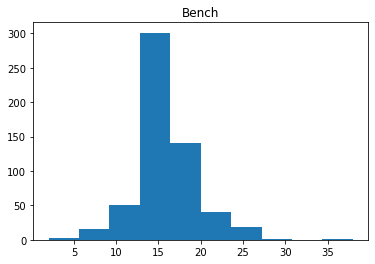

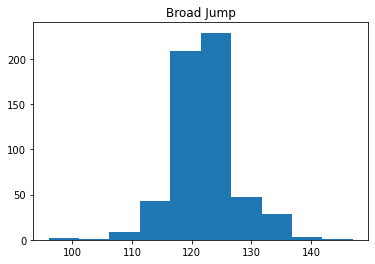

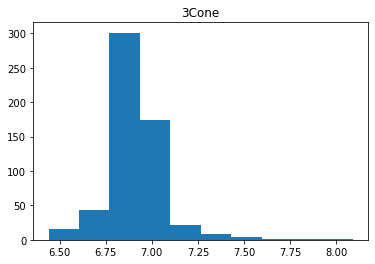

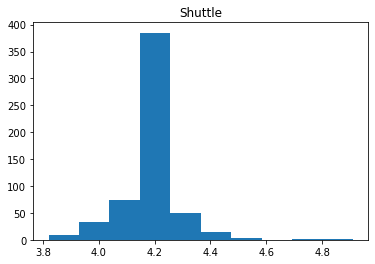

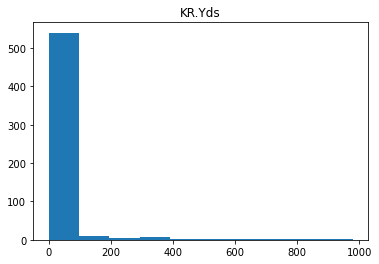

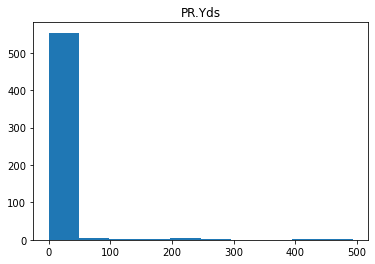

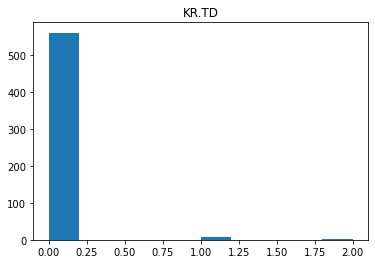

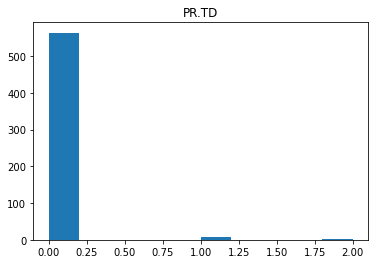

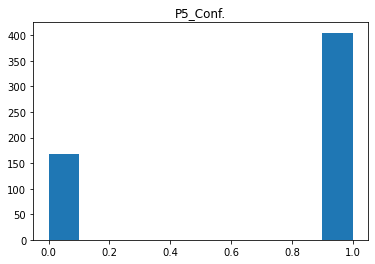

In [29]:
dbs_info = dbs[['Player', 'Pos', 'Year', 'AV/Yr']]

for i in dbs.columns[7:-2]:
    plt.figure()
    plt.hist(dbs[i])
    plt.title(i)

Mean Squared Error: 4256.488755667191


,Id,Pick,Player,Pos,Year,AV/Yr
27,1551,51.500000,Jalen Ramsey,CB,2016,10.200000
163,1556,52.110000,Eli Apple,CB,2016,3.200000
65,1338,57.730000,Ronald Darby,CB,2015,4.333333
138,1037,60.210000,Justin Gilbert,DB,2014,1.333333
10,356,66.020000,Brandon Hogan,DB,2011,0.000000
...,...,...,...,...,...,...
147,2514,197.881111,Kadar Hollman,CB,2019,0.500000
18,512,198.062488,Tommie Campbell,DB,2011,1.000000
97,1542,198.062488,Josh Furman,DB,2015,NaN
85,733,198.062488,Jordan Bernstine,DB,2012,0.000000


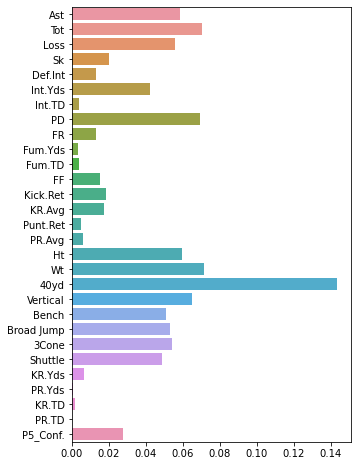

In [30]:
rfr = RandomForestRegressor()

X = dbs[dbs.columns[8:-2]]
y = dbs['Pick']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

model = rfr.fit(X_train, y_train)

y_predict = model.predict(X_test)

mse = mean_squared_error(y_test, y_predict)

print('Mean Squared Error:', mse)

output = pd.DataFrame({'Id':X_test.index, 'Pick':y_predict})
output_db = output.merge(dbs_info, how='left', left_on='Id', right_on=dbs_info.index)


display(output_db.sort_values('Pick'))

plt.figure(figsize=(5, 8))
sns.barplot(model.feature_importances_, X.columns)

In [31]:
lb_pos = ['LB', 'OLB', 'ILB']
lbs = df[df.Pos.str.startswith(tuple(lb_pos))]

lbs_col = lbs.columns[:6].append(lbs.columns[13:14].append(lbs.columns[29:54].append(lbs.columns[55:60].append(lbs.columns[61:]))))

lbs = lbs[lbs_col]

<ipython-input-32-6f934260b965>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


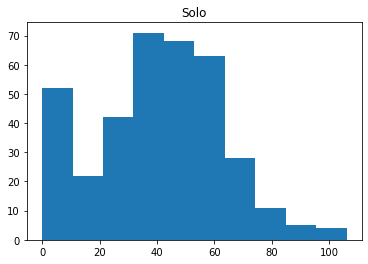

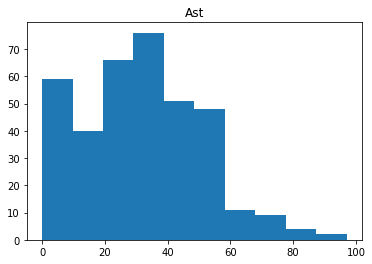

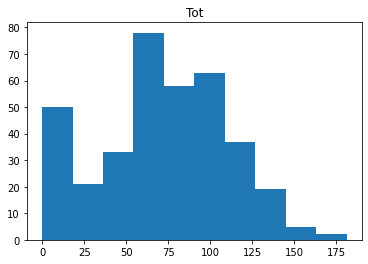

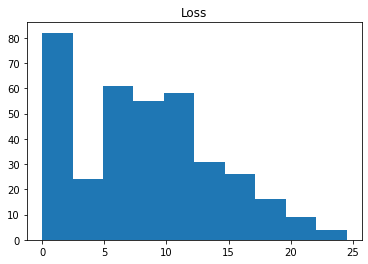

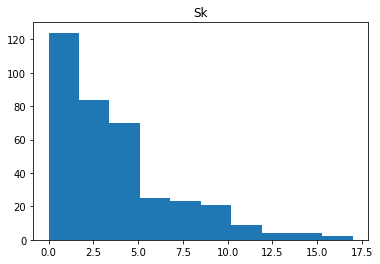

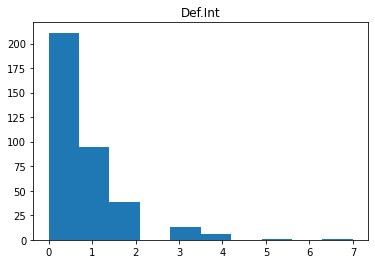

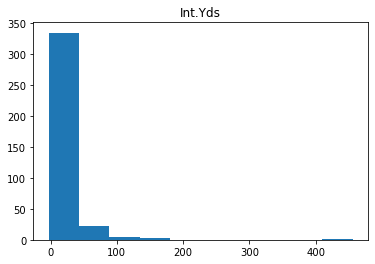

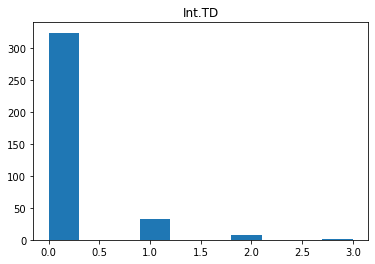

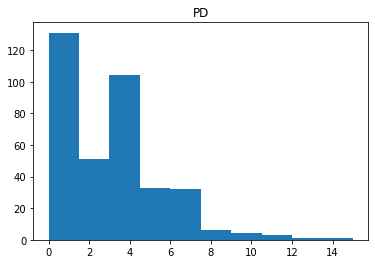

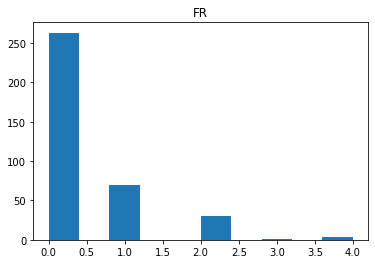

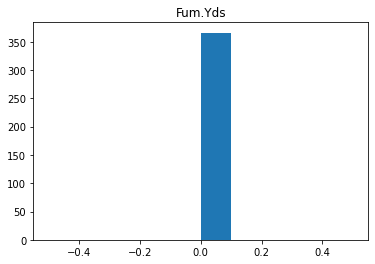

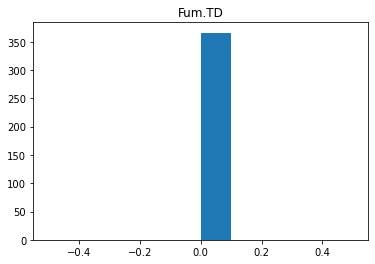

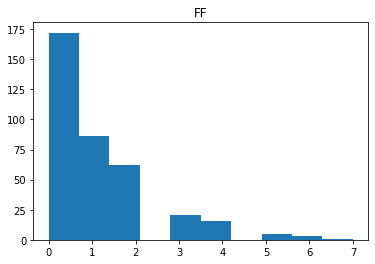

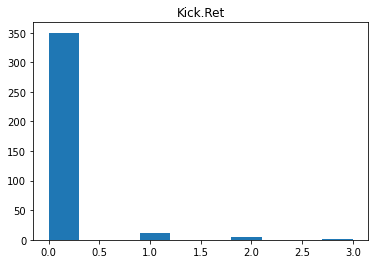

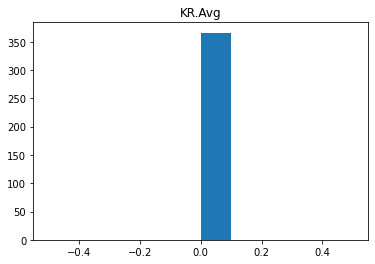

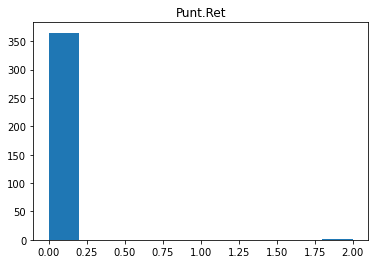

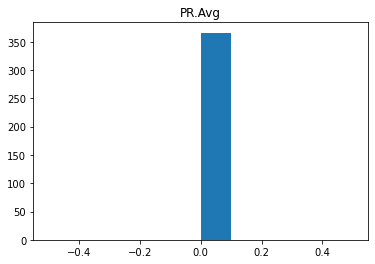

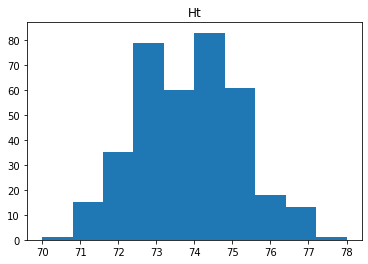

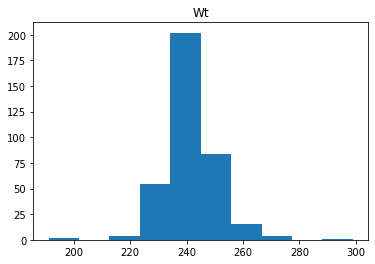

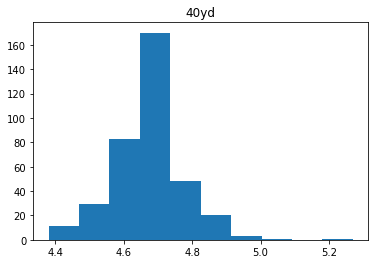

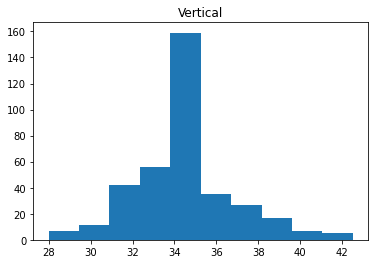

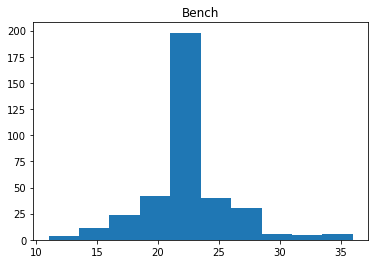

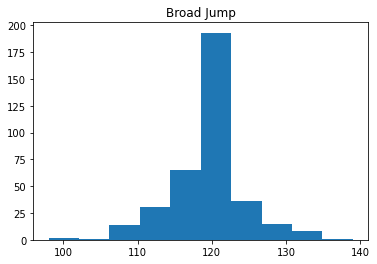

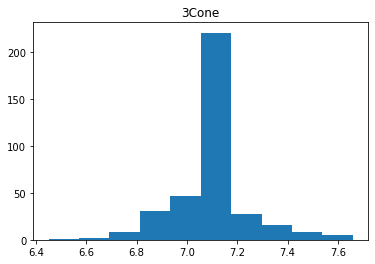

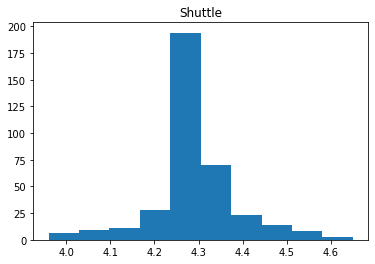

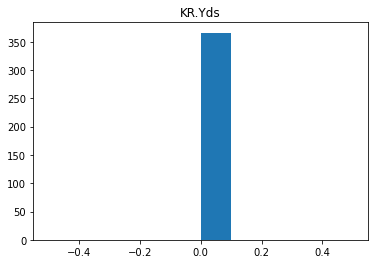

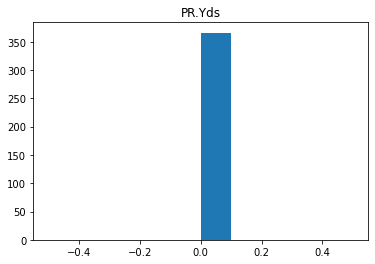

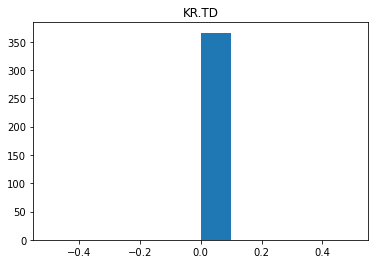

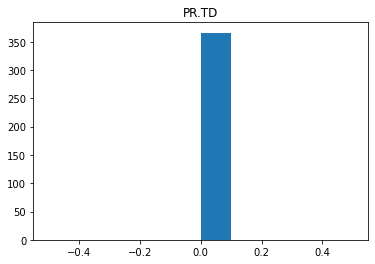

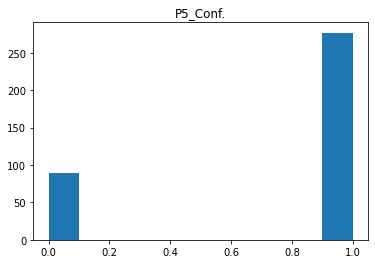

In [32]:
lbs_info = lbs[['Player', 'Pos', 'Year', 'AV/Yr']]

for i in lbs.columns[7:-2]:
    plt.figure()
    plt.hist(lbs[i])
    plt.title(i)

Mean Squared Error: 4350.30742908889


,Id,Pick,Player,Pos,Year,AV/Yr
67,1080,66.150000,Jeremiah Attaochu,LB,2014,2.285714
22,1555,68.900000,Leonard Floyd,OLB,2016,7.400000
29,2281,72.710000,Peter Kalambayi,LB,2018,1.000000
33,2686,73.510000,Alex Highsmith,LB,2020,4.000000
100,1828,83.820000,Charles Harris,OLB,2017,2.000000
...,...,...,...,...,...,...
6,1286,198.676667,Tyler Starr,LB,2014,0.000000
66,2823,204.165000,TJ Brunson,LB,2020,0.000000
34,2493,209.189389,EJ Speed,LB,2019,1.000000
5,446,209.189389,DJ Smith,LB,2011,1.500000


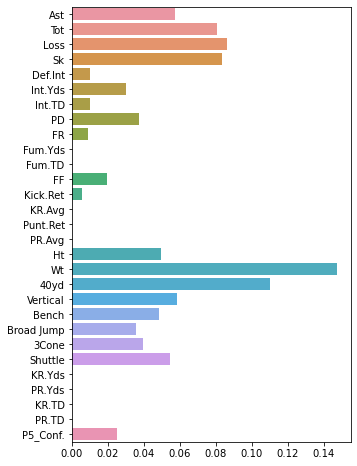

In [33]:
rfr = RandomForestRegressor()

X = lbs[lbs.columns[8:-2]]
y = lbs['Pick']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

model = rfr.fit(X_train, y_train)

y_predict = model.predict(X_test)

mse = mean_squared_error(y_test, y_predict)

print('Mean Squared Error:', mse)

output = pd.DataFrame({'Id':X_test.index, 'Pick':y_predict})
output_lb = output.merge(lbs_info, how='left', left_on='Id', right_on=lbs_info.index)


display(output_lb.sort_values('Pick'))

plt.figure(figsize=(5, 8))
sns.barplot(model.feature_importances_, X.columns)

In [34]:
dl_pos = ['DE', 'DT', 'DL', 'NT']
dls = df[df.Pos.str.startswith(tuple(dl_pos))]

dls_col = dls.columns[:6].append(dls.columns[13:14].append(dls.columns[29:54].append(dls.columns[55:60].append(dls.columns[61:]))))

dls = dls[dls_col]

<ipython-input-35-cd4d92abbe0d>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


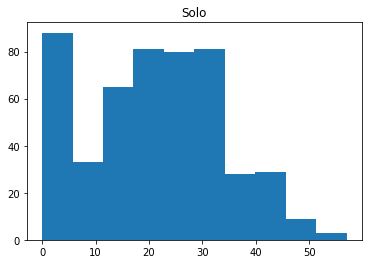

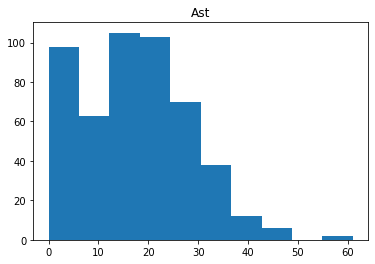

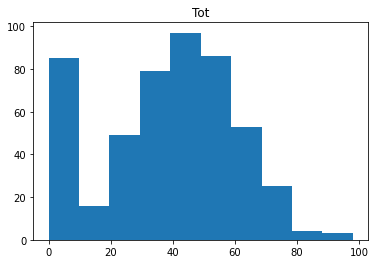

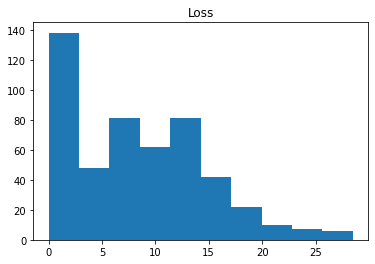

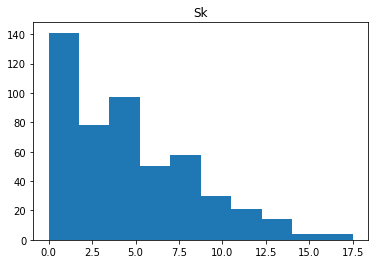

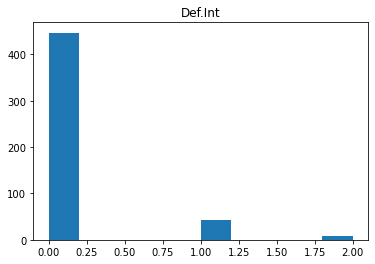

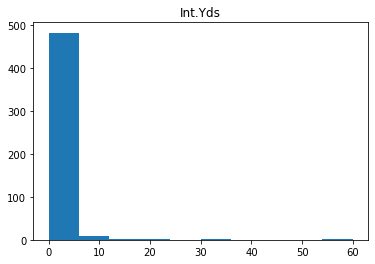

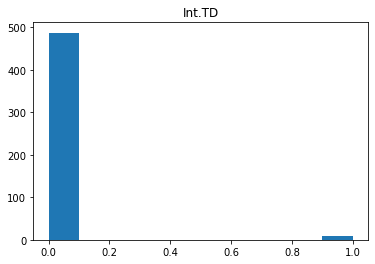

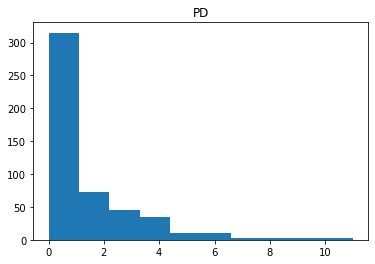

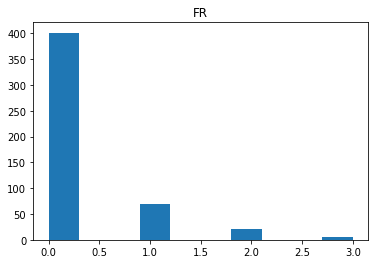

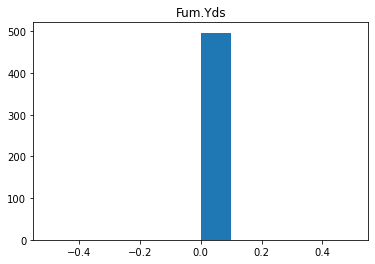

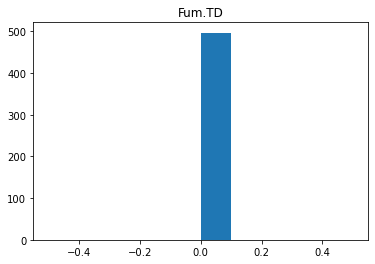

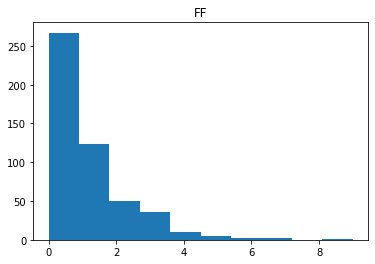

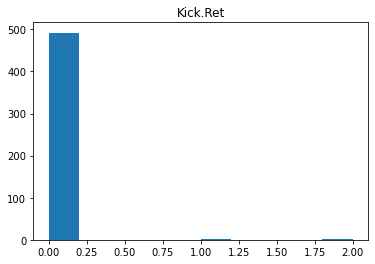

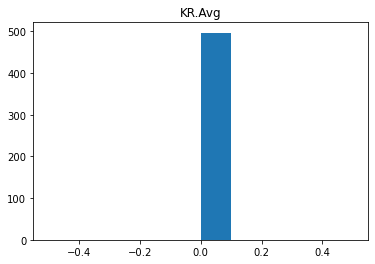

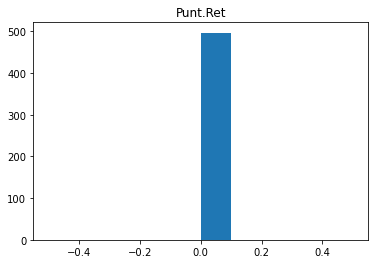

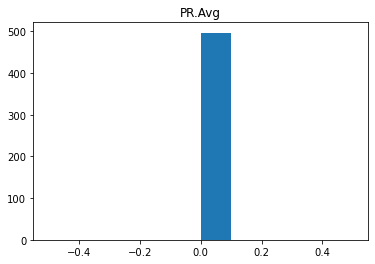

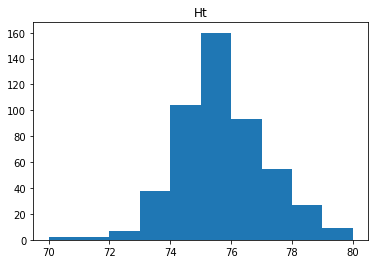

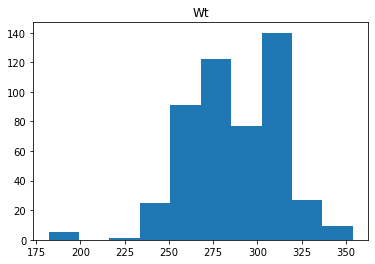

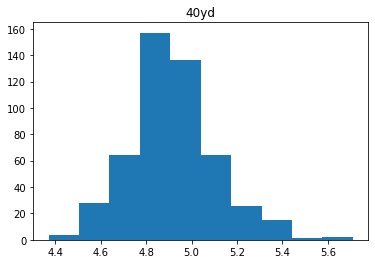

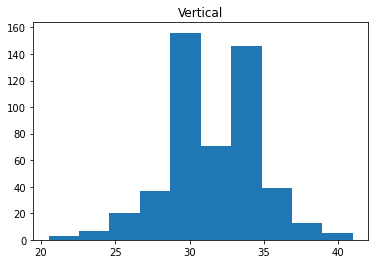

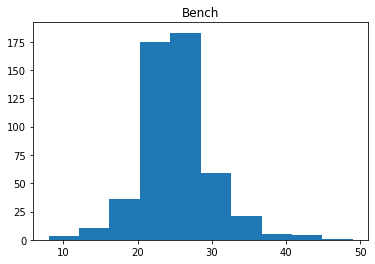

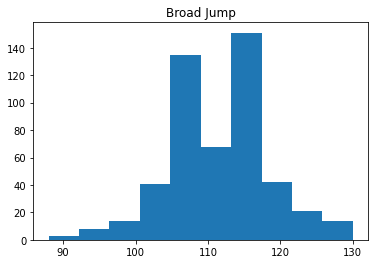

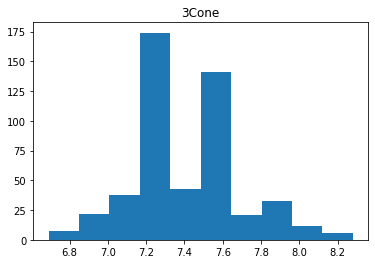

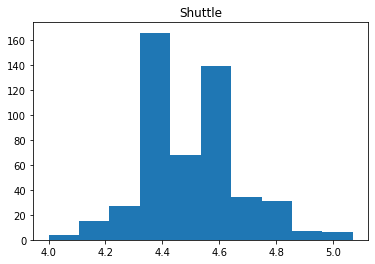

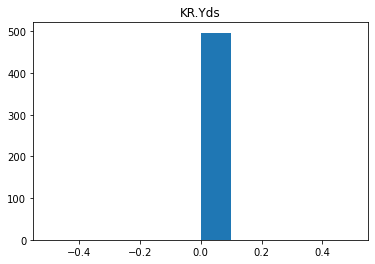

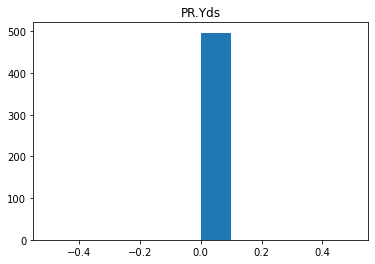

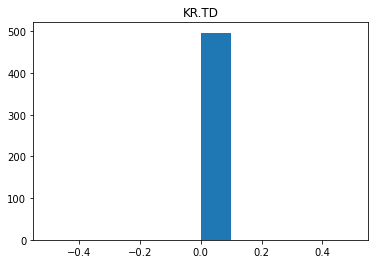

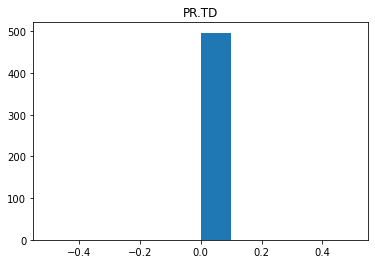

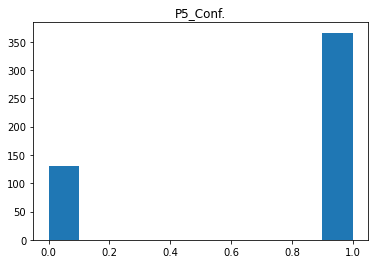

In [35]:
dls_info = dls[['Player', 'Pos', 'Year', 'AV/Yr']]

for i in dls.columns[7:-2]:
    plt.figure()
    plt.hist(dls[i])
    plt.title(i)

Mean Squared Error: 5250.131006260578


,Id,Pick,Player,Pos,Year,AV/Yr
101,551,41.140000,Derek Wolfe,DT,2012,5.444444
109,307,43.950000,DaQuan Bowers,DE,2011,1.400000
62,1651,54.410000,Charles Tapper,DE,2016,0.000000
125,1320,57.670000,Malcom Brown,DT,2015,6.333333
63,1808,61.340000,Solomon Thomas,DE,2017,3.750000
...,...,...,...,...,...,...
49,2820,192.630000,Jashon Cornell,DT,2020,NaN
39,1527,199.853485,Brian Mihalik,DE,2015,0.500000
103,1265,199.853485,Terrence Fede,DE,2014,1.500000
97,154,199.853485,Austen Lane,DE,2010,1.400000


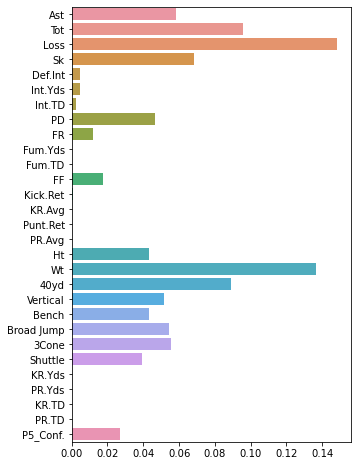

In [36]:
rfr = RandomForestRegressor()

X = dls[dls.columns[8:-2]]
y = dls['Pick']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

model = rfr.fit(X_train, y_train)

y_predict = model.predict(X_test)

mse = mean_squared_error(y_test, y_predict)

print('Mean Squared Error:', mse)

output = pd.DataFrame({'Id':X_test.index, 'Pick':y_predict})
output_dl = output.merge(dls_info, how='left', left_on='Id', right_on=dls_info.index)


display(output_dl.sort_values('Pick'))

plt.figure(figsize=(5, 8))
sns.barplot(model.feature_importances_, X.columns)

In [37]:
def_output = pd.concat([output_db, output_lb, output_dl])
def_output['Year'] = def_output['Year'].astype('int64')

In [38]:
#def_output.sort_values('Pick')

In [39]:
all_output= pd.concat([def_output, off_output])

all_output.sort_values('Pick').head(20)

,Id,Pick,Player,Pos,Year,AV/Yr
17,2063,40.58,Baker Mayfield,QB,2018,10.333333
101,551,41.14,Derek Wolfe,DT,2012,5.444444
15,1052,42.57,Johnny Manziel,QB,2014,2.500000
27,2585,43.71,Joe Burrow,QB,2020,7.000000
109,307,43.95,DaQuan Bowers,DE,2011,1.400000
36,266,45.21,Blaine Gabbert,QB,2011,1.600000
20,1150,45.43,Logan Thomas,QB,2014,1.000000
9,517,45.58,Robert Griffin III,QB,2012,4.111111
32,257,50.61,Cam Newton,QB,2011,11.100000
27,1551,51.50,Jalen Ramsey,CB,2016,10.200000


In [40]:
#all_output.groupby(['Year', 'Pos']).agg({'Pick':'mean'}).head(20)

In [41]:
df.drop(['Drafted (tm/rnd/yr)', 'Draft.Yr'], axis=1, inplace=True)

In [42]:
test_df = df[['Pick', 'Player']]

test_df['Actual_Pick'] = test_df['Pick']
test_df = test_df.reset_index()
test_df.drop(['Pick', 'index'] , axis=1, inplace=True)

test_df

<ipython-input-42-c45b99042b68>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Actual_Pick'] = test_df['Pick']


,Player,Actual_Pick
0,Sam Bradford,1
1,Ndamukong Suh,2
2,Gerald McCoy,3
3,Trent Williams,4
4,Eric Berry,5
...,...,...
2775,Stephen Sullivan,251
2776,Tyrie Cleveland,252
2777,Kyle Hinton,253
2778,Derrek Tuszka,254


In [43]:
rel_cols = df.columns[4:5].append(df.columns[14:-2])
print(rel_cols)
#rel_pos = ['QB', 'RB', 'WR', 'TE', 'DL', 'DE', 'DT', 'LB', 'NT', 'OLB', ]
player_info = df[['Player', 'Pos', 'Year', 'AV/Yr']]

Index(['Pos', 'Cmp', 'Pass.Att', 'Pct', 'Pass.Yds', 'Pass.TD', 'Pass.Int',
       'Rate', 'Rush.Att', 'Rush.Yds', 'Rush.Avg', 'Rush.TD', 'Rec', 'Rec.Yds',
       'Rec.Avg', 'Rec.TD', 'Solo', 'Ast', 'Tot', 'Loss', 'Sk', 'Def.Int',
       'Int.Yds', 'Int.TD', 'PD', 'FR', 'Fum.Yds', 'Fum.TD', 'FF', 'Kick.Ret',
       'KR.Avg', 'Punt.Ret', 'PR.Avg', 'Ht', 'Wt', '40yd', 'Vertical', 'Bench',
       'Broad Jump', '3Cone', 'Shuttle', 'KR.Yds', 'PR.Yds', 'KR.TD', 'PR.TD',
       'P5_Conf.'],
      dtype='object')


Mean Squared Error: 4912.135744626804


,Id,Pick,Player,Pos,Year,AV/Yr
1,2585,14.210000,Joe Burrow,QB,2020,7.0
22,2606,35.930000,Justin Jefferson,WR,2020,12.0
107,2692,40.480000,Saahdiq Charles,T,2020,0.0
13,2597,40.880000,Tristan Wirfs,T,2020,11.0
220,2810,54.090000,Kenny Willekes,DE,2020,NaN
...,...,...,...,...,...,...
231,2822,195.276988,Thakarius Keyes,CB,2020,1.0
224,2815,208.836910,Dustin Woodard,C,2020,NaN
201,2791,220.175000,Tyler Davis,TE,2020,0.0
225,2816,226.375000,Ben DiNucci,QB,2020,1.0


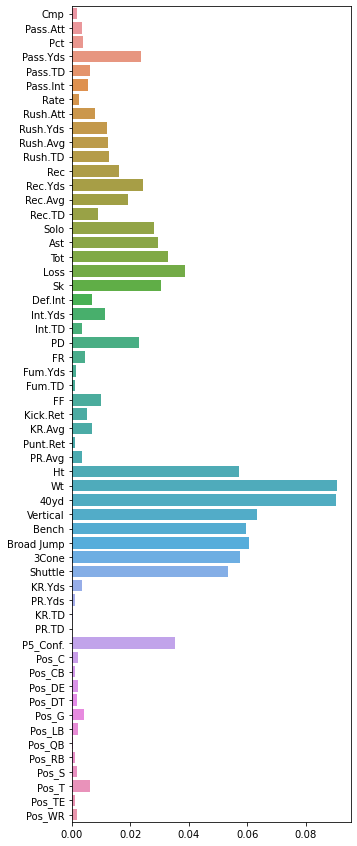

In [44]:
rfr = RandomForestRegressor(random_state=0)
pre_2020 = df[df['Year']<2020]
yr_2020 = df[df['Year']==2020]

X_train_h = pre_2020[rel_cols]
X_train_h = pd.get_dummies(X_train_h)
y_train = pre_2020['Pick']
X_test_h = yr_2020[rel_cols]
X_test_h = pd.get_dummies(X_test_h)
y_test = yr_2020['Pick']

train_cols = X_train_h.columns.intersection(X_test_h.columns)
test_cols = X_test_h.columns.intersection(X_train_h.columns)

X_train = X_train_h[train_cols]
X_test = X_test_h[test_cols]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

model = rfr.fit(X_train, y_train)

y_predict = model.predict(X_test)

mse = mean_squared_error(y_test, y_predict)

print('Mean Squared Error:', mse)

output = pd.DataFrame({'Id':X_test.index, 'Pick':y_predict})
output_2020 = output.merge(player_info, how='left', left_on='Id', right_on=player_info.index)


display(output_2020.sort_values('Pick'))

plt.figure(figsize=(5, 15))
sns.barplot(model.feature_importances_, X_test.columns)

In [45]:
from sklearn.linear_model import ElasticNet, LinearRegression, Ridge
from sklearn.ensemble import VotingRegressor

en = ElasticNet(random_state=0)
rid = Ridge(random_state=0)
linreg = LinearRegression()
vote = VotingRegressor(estimators = [('rf', rfr), ('en', en), ('rid', rid), ('linreg', linreg)]) 

pre_2020 = df[df['Year']<2020]
yr_2020 = df[df['Year']==2020]

X_train_h = pre_2020[rel_cols]
X_train_h = pd.get_dummies(X_train_h)
y_train = pre_2020['Pick']
X_test_h = yr_2020[rel_cols]
X_test_h = pd.get_dummies(X_test_h)
y_test = yr_2020['Pick']

train_cols = X_train_h.columns.intersection(X_test_h.columns)
test_cols = X_test_h.columns.intersection(X_train_h.columns)

X_train = X_train_h[train_cols]
X_test = X_test_h[test_cols]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

model = vote.fit(X_train, y_train)

y_predict = model.predict(X_test)

mse = mean_squared_error(y_test, y_predict)

print('Mean Squared Error:', mse)

output = pd.DataFrame({'Id':X_test.index, 'Pick':y_predict})
output_2020 = output.merge(player_info, how='left', left_on='Id', right_on=player_info.index)


display(output_2020.sort_values('Pick').head(20))

plt.figure(figsize=(5, 15))
#sns.barplot(model.feature_importances_, X_test.columns)
print(model.estimators_)

Mean Squared Error: 4472.395172406409


C:\Python\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1649.3239689134061, tolerance: 1364.0502961675227
  model = cd_fast.enet_coordinate_descent(


,Id,Pick,Player,Pos,Year,AV/Yr
1,2585,18.395242,Joe Burrow,QB,2020,7.0
79,2664,40.098713,Lynn Bowden Jr,WR,2020,2.0
13,2597,51.631239,Tristan Wirfs,T,2020,11.0
6,2590,52.429887,Justin Herbert,QB,2020,13.0
8,2592,57.991545,Isaiah Simmons,LB,2020,5.0
25,2609,59.455434,Brandon Aiyuk,WR,2020,6.0
22,2606,63.881299,Justin Jefferson,WR,2020,12.0
2,2586,65.107244,Chase Young,DE,2020,13.0
11,2595,67.052976,Mekhi Becton,T,2020,5.0
129,2714,67.179784,James Lynch,DT,2020,1.0


[RandomForestRegressor(random_state=0), ElasticNet(random_state=0), Ridge(random_state=0), LinearRegression()]


<Figure size 360x1080 with 0 Axes>

In [46]:
output_2020['Pick_Ordinal'] = output_2020['Pick'].rank(method='first')
output_2020['Pick_Distance'] = output_2020.index - output_2020['Pick_Ordinal']
display(output_2020.sort_values('Pick').head(32))


,Id,Pick,Player,Pos,Year,AV/Yr,Pick_Ordinal,Pick_Distance
1,2585,18.395242,Joe Burrow,QB,2020,7.0,1.0,0.0
79,2664,40.098713,Lynn Bowden Jr,WR,2020,2.0,2.0,77.0
13,2597,51.631239,Tristan Wirfs,T,2020,11.0,3.0,10.0
6,2590,52.429887,Justin Herbert,QB,2020,13.0,4.0,2.0
8,2592,57.991545,Isaiah Simmons,LB,2020,5.0,5.0,3.0
25,2609,59.455434,Brandon Aiyuk,WR,2020,6.0,6.0,19.0
22,2606,63.881299,Justin Jefferson,WR,2020,12.0,7.0,15.0
2,2586,65.107244,Chase Young,DE,2020,13.0,8.0,-6.0
11,2595,67.052976,Mekhi Becton,T,2020,5.0,9.0,2.0
129,2714,67.179784,James Lynch,DT,2020,1.0,10.0,119.0


Here is the first attempt at modeling the entire 2020 NFL draft. It does some things well, and some things very poorly. The first thing to note is that it does not consider offensive linemen at all. This is because they don't have any measurable on-field stats, so all we have to go on is the combine, which many players don't go to, or even if they do, they don't do all the drills. I will need to find another way to include them.

The model gets 8 first rounders correct, including the first overall pick exactly correct, and just one off for the 2nd overall. I would consider this to be a small success considering how hard it is even for supposed draft experts to get much right about the first round aside from the first few picks. 

However, because I put all positions into the same model, and the model didn't seemt to weight positions very heavily, there are likely some discrepencies I could correct to make it more accurate. For example, it weights a player's weight and 40yd time very highly. This could be dispropotionately affecting heavier and slower positions like DEs and DTs compared to lighter and faster players like CBs, and WRs, or vice versa. Perhaps a better way of dealing with this would be running the model on each position individually, and then combining the resulting dataframes at the end.

In [47]:
display(output_2020.sort_values('Pick_Distance', ascending=False).head(10))
display(output_2020.sort_values('Pick_Distance', ascending=True).head(10))

,Id,Pick,Player,Pos,Year,AV/Yr,Pick_Ordinal,Pick_Distance
227,2818,91.342072,Casey Toohill,DE,2020,1.0,29.0,198.0
220,2810,88.881521,Kenny Willekes,DE,2020,NaN,23.0,197.0
226,2817,95.012822,Carlos Davis,DT,2020,1.0,38.0,188.0
219,2809,92.816258,Cole McDonald,QB,2020,NaN,34.0,185.0
189,2779,83.804632,Khalil Davis,DT,2020,0.0,15.0,174.0
204,2794,97.633386,Simon Stepaniak,T,2020,NaN,42.0,162.0
213,2803,106.420863,Carter Coughlin,LB,2020,2.0,65.0,148.0
205,2795,104.270082,Prince Tega Wanogho,T,2020,0.0,60.0,145.0
236,2827,113.132938,Jonathan Garvin,DE,2020,1.0,92.0,144.0
242,2834,115.418140,Brian Cole II,S,2020,NaN,98.0,144.0


,Id,Pick,Player,Pos,Year,AV/Yr,Pick_Ordinal,Pick_Distance
32,2616,167.476933,Clyde Edwards-Helaire,RB,2020,8.0,242.0,-210.0
16,2600,142.017768,AJ Terrell,CB,2020,5.0,203.0,-187.0
57,2641,167.637652,Van Jefferson,WR,2020,1.0,243.0,-186.0
26,2610,144.953153,Jordan Love,QB,2020,NaN,211.0,-185.0
35,2619,150.194954,DAndre Swift,RB,2020,6.0,218.0,-183.0
75,2660,183.453590,KeShawn Vaughn,RB,2020,1.0,247.0,-172.0
63,2647,151.728108,Willie Gay Jr,LB,2020,4.0,224.0,-161.0
53,2637,140.701782,Jalen Hurts,QB,2020,4.0,200.0,-147.0
106,2691,183.576307,Akeem Davis-Gaither,LB,2020,2.0,248.0,-142.0
74,2659,143.551124,Jonah Jackson,G,2020,7.0,207.0,-133.0


The top table is the top 10 players ranked by positive draft pick distance. This means they should've been drafted higher than where they actually were based on the model. We'll call these undervalued players. The bottom table is the inverse, so the top 10 players ranked by negative draft pick distance, making them overvalued players. One immediate observation is that heavier positions, like DE, DT, or LB appear slightly more often on t he undervalued table, while lighter positions like CB, RB, and WR, appear more often on the overvalued table. This could be because of how strongly the model values a player's weight without strong consideration of that player's position. In the draft profiles of both Kenny Willekes and CJ Henderson, both are criticized for being relatively light for their positions. However the model just sees two absolute weights and values the heavier player more. This seems like a potential a flaw in the model. 

CBs in general seem very hard to rank with the provided stats. This is because if they are good, they won't even let their receiver get open very often, which means fewer targets and therefore fewer tackles, PDs and INTs. 

In [48]:
rfr = RandomForestRegressor(random_state=0) #n_estimators=90, min_samples_split=42, max_leaf_nodes=22, max_features=9, max_depth=14, 
en = ElasticNet(random_state=0)
rid = Ridge(random_state=0)
linreg = LinearRegression()
vote = VotingRegressor(estimators = [('rf', rfr), ('en', en), ('rid', rid), ('linreg', linreg)]) 

pre_2020_qbs = qbs[qbs['Year']<2020]
qbs_2020 = qbs[qbs['Year']==2020]

X_train = pre_2020_qbs[qb_cols[8:-1]]
X_train.drop('Year', axis=1, inplace=True)
y_train = pre_2020_qbs['Pick']
X_test = qbs_2020[qb_cols[8:-1]]
X_test.drop('Year', axis=1, inplace=True)
y_test = qbs_2020['Pick']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

model = vote.fit(X_train, y_train)

y_predict = model.predict(X_test)

mse = mean_squared_error(y_test, y_predict)

print('Mean Squared Error:', mse)

output = pd.DataFrame({'Id':X_test.index, 'Pick':y_predict})
output_2020_qbs = output.merge(qbs_info, how='left', left_on='Id', right_on=qbs_info.index)


display(output_2020_qbs.sort_values('Pick'))

plt.figure(figsize=(5, 5))
#sns.barplot(model.feature_importances_, X_test.columns)

C:\Python\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Mean Squared Error: 7141.817015062794


C:\Python\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200442.20648615249, tolerance: 78.87505508474577
  model = cd_fast.enet_coordinate_descent(


,Id,Pick,Player,Pos,Year,AV/Yr
0,2585,-24.931769,Joe Burrow,QB,2020,7.0
2,2590,41.810227,Justin Herbert,QB,2020,13.0
8,2774,102.759472,Jake Luton,QB,2020,1.0
5,2706,114.781594,Jacob Eason,QB,2020,NaN
9,2809,116.299433,Cole McDonald,QB,2020,NaN
4,2637,135.690780,Jalen Hurts,QB,2020,4.0
12,2829,140.361471,Nate Stanley,QB,2020,NaN
11,2825,145.961083,Tommy Stevens,QB,2020,0.0
7,2752,148.005123,Jake Fromm,QB,2020,NaN
1,2589,155.112088,Tua Tagovailoa,QB,2020,5.0


<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [49]:

en = ElasticNet()

X_train = pre_2020_qbs[qb_cols[8:-1]]
X_train.drop('Year', axis=1, inplace=True)
y_train = pre_2020_qbs['Pick']
X_test = qbs_2020[qb_cols[8:-1]]
X_test.drop('Year', axis=1, inplace=True)
y_test = qbs_2020['Pick']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

model = en.fit(X_train, y_train)

y_predict = model.predict(X_test)

mse = mean_squared_error(y_test, y_predict)

print('Mean Squared Error:', mse)

output = pd.DataFrame({'Id':X_test.index, 'Pick':y_predict})
output_2020_qbs = output.merge(qbs_info, how='left', left_on='Id', right_on=qbs_info.index)


display(output_2020_qbs.sort_values('Pick'))

plt.figure(figsize=(5, 5))
#sns.barplot(model.feature_importances_, X_test.columns)

Mean Squared Error: 6312.652547347089


C:\Python\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Python\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200442.20648615249, tolerance: 78.87505508474577
  model = cd_fast.enet_coordinate_descent(


,Id,Pick,Player,Pos,Year,AV/Yr
0,2585,-21.277336,Joe Burrow,QB,2020,7.0
2,2590,30.441978,Justin Herbert,QB,2020,13.0
9,2809,81.925129,Cole McDonald,QB,2020,NaN
5,2706,104.287365,Jacob Eason,QB,2020,NaN
8,2774,107.380229,Jake Luton,QB,2020,1.0
1,2589,122.704227,Tua Tagovailoa,QB,2020,5.0
4,2637,124.315540,Jalen Hurts,QB,2020,4.0
3,2610,126.199672,Jordan Love,QB,2020,NaN
11,2825,139.961152,Tommy Stevens,QB,2020,0.0
7,2752,144.098384,Jake Fromm,QB,2020,NaN


<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [50]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'max_depth':np.arange(2, 20, 2),'min_samples_split':np.arange(2, 502, 10), 'max_leaf_nodes':np.arange(2, 102, 4), 'n_estimators':np.arange(10, 1000, 10), 'max_features':np.arange(1, 20)}
#params = {'max_depth':np.arange(2, 20, 2)}
#

rf = RandomForestRegressor()

rf_cv = RandomizedSearchCV(rf, param_grid)

rf_cv.fit(X_train, y_train)

print(rf_cv.best_params_)
print(rf_cv.best_score_)


model.get_params()

{'n_estimators': 680, 'min_samples_split': 22, 'max_leaf_nodes': 2, 'max_features': 4, 'max_depth': 12}
0.0695660899949774


{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

C:\Python\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Mean Squared Error: 4203.8608411291325


,Id,Pick,Player,Pos,Year,AV/Yr
4,2606,52.390000,Justin Jefferson,WR,2020,12.0
15,2676,60.130000,Devin Duvernay,WR,2020,4.0
6,2617,75.340000,Tee Higgins,WR,2020,6.0
10,2633,81.290000,Chase Claypool,WR,2020,7.0
0,2596,83.440000,Henry Ruggs III,WR,2020,4.0
2,2601,85.770000,CeeDee Lamb,WR,2020,8.0
13,2664,90.000000,Lynn Bowden Jr,WR,2020,2.0
9,2630,93.240000,KJ Hamler,WR,2020,3.0
8,2626,95.320000,Laviska Shenault Jr,WR,2020,5.0
7,2618,95.442000,Michael Pittman Jr,WR,2020,4.0


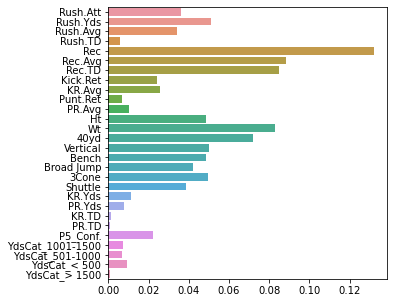

In [51]:
rfr = RandomForestRegressor(random_state=0)
pre_2020_wrs = wrs[wrs['Year']<2020]
wrs_2020 = wrs[wrs['Year']==2020]

X_train = pre_2020_wrs[wrs.columns[7:]]
X_train.drop(['Year', 'Draft.Yr', 'Rec.Yds', 'Rec.Yds.Std', 'AV/Yr'], axis=1, inplace=True)
X_train = pd.get_dummies(X_train)
y_train = pre_2020_wrs['Pick']
X_test = wrs_2020[wrs.columns[7:]]
X_test.drop(['Year', 'Draft.Yr', 'Rec.Yds', 'Rec.Yds.Std', 'AV/Yr'], axis=1, inplace=True)
X_test = pd.get_dummies(X_test)
y_test = wrs_2020['Pick']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

model = rfr.fit(X_train, y_train)

y_predict = model.predict(X_test)

mse = mean_squared_error(y_test, y_predict)

print('Mean Squared Error:', mse)

output = pd.DataFrame({'Id':X_test.index, 'Pick':y_predict})
output_2020_wrs = output.merge(wrs_info, how='left', left_on='Id', right_on=wrs_info.index)


display(output_2020_wrs.sort_values('Pick'))

plt.figure(figsize=(5, 5))
sns.barplot(model.feature_importances_, X_test.columns)


In [52]:
"""param_grid = {'max_depth':np.arange(2, 20, 2),'min_samples_split':np.arange(2, 502, 10), 'max_leaf_nodes':np.arange(2, 102, 4), 'n_estimators':np.arange(10, 1000, 10), 'max_features':np.arange(1, 20)}


rf = RandomForestRegressor()

rf_cv = RandomizedSearchCV(rf, param_grid)

rf_cv.fit(X_train, y_train)

print(rf_cv.best_params_)
print(rf_cv.best_score_)"""

"param_grid = {'max_depth':np.arange(2, 20, 2),'min_samples_split':np.arange(2, 502, 10), 'max_leaf_nodes':np.arange(2, 102, 4), 'n_estimators':np.arange(10, 1000, 10), 'max_features':np.arange(1, 20)}\n\n\nrf = RandomForestRegressor()\n\nrf_cv = RandomizedSearchCV(rf, param_grid)\n\nrf_cv.fit(X_train, y_train)\n\nprint(rf_cv.best_params_)\nprint(rf_cv.best_score_)"

Mean Squared Error: 5337.222365667695


C:\Python\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Id,Pick,Player,Pos,Year,AV/Yr
10,2677,63.710000,Darrynton Evans,RB,2020,1.0
5,2639,77.260000,JK Dobbins,RB,2020,7.0
3,2625,80.420000,Jonathan Taylor,RB,2020,10.0
0,320,97.100000,Daniel Thomas,RB,2020,-2.2
9,2670,103.250000,Zack Moss,RB,2020,5.0
11,2696,113.290000,Joshua Kelley,RB,2020,3.0
7,2650,118.790000,Antonio Gibson,RB,2020,5.0
13,2708,126.430000,Anthony McFarland Jr,RB,2020,1.0
17,2830,126.860000,Raymond Calais,RB,2020,0.0
2,2619,134.150000,DAndre Swift,RB,2020,6.0


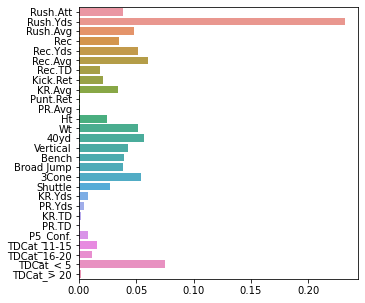

In [53]:
rfr = RandomForestRegressor(random_state=0)
pre_2020_rbs = rbs[rbs['Year']<2020]
rbs_2020 = rbs[rbs['Year']==2020]

X_train = pre_2020_rbs[rbs.columns[7:]]
X_train.drop(['Year','Draft.Yr', 'Rush.TD', 'AV/Yr'], axis=1, inplace=True)
X_train = pd.get_dummies(X_train)
y_train = pre_2020_rbs['Pick']
X_test = rbs_2020[rbs.columns[7:]]
X_test.drop(['Year','Draft.Yr', 'Rush.TD', 'AV/Yr'], axis=1, inplace=True)
X_test = pd.get_dummies(X_test)
y_test = rbs_2020['Pick']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

model = rfr.fit(X_train, y_train)

y_predict = model.predict(X_test)

mse = mean_squared_error(y_test, y_predict)

print('Mean Squared Error:', mse)

output = pd.DataFrame({'Id':X_test.index, 'Pick':y_predict})
output_2020_rbs = output.merge(rbs_info, how='left', left_on='Id', right_on=rbs_info.index)


display(output_2020_rbs.sort_values('Pick'))

plt.figure(figsize=(5, 5))
sns.barplot(model.feature_importances_, X_test.columns)


Mean Squared Error: 1978.907062037037


C:\Python\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Id,Pick,Player,Pos,Year,AV/Yr
8,2720,75.910000,Brycen Hopkins,TE,2020,0.0
0,2627,95.380000,Cole Kmet,TE,2020,2.0
5,2699,99.860000,Harrison Bryant,TE,2020,2.0
1,2675,102.560000,Devin Asiasi,TE,2020,0.0
6,2702,114.520000,Albert Okwuegbunam,TE,2020,1.0
2,2678,118.340000,Josiah Deguara,TE,2020,0.0
7,2717,126.470000,Colby Parkinson,TE,2020,0.0
4,2689,135.876667,Adam Trautman,TE,2020,2.0
11,2836,145.900000,Stephen Sullivan,TE,2020,0.0
3,2685,165.840000,Dalton Keene,TE,2020,0.0


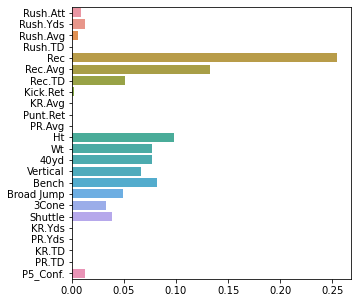

In [54]:
rfr = RandomForestRegressor(random_state=0)
pre_2020_tes = tes[tes['Year']<2020]
tes_2020 = tes[tes['Year']==2020]

te_cols = list(te_cols)
#te_cols.remove('Draft.Yr')

X_train = pre_2020_tes[tes.columns[7:]]
X_train.drop(['Year', 'Rec.Yds', 'Draft.Yr', 'AV/Yr'], axis=1, inplace=True)
X_train = pd.get_dummies(X_train)
y_train = pre_2020_tes['Pick']
X_test = tes_2020[tes.columns[7:]]
X_test.drop(['Year', 'Rec.Yds', 'Draft.Yr', 'AV/Yr'], axis=1, inplace=True)
X_test = pd.get_dummies(X_test)
y_test = tes_2020['Pick']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

model = rfr.fit(X_train, y_train)

y_predict = model.predict(X_test)

mse = mean_squared_error(y_test, y_predict)

print('Mean Squared Error:', mse)

output = pd.DataFrame({'Id':X_test.index, 'Pick':y_predict})
output_2020_tes = output.merge(tes_info, how='left', left_on='Id', right_on=tes_info.index)


display(output_2020_tes.sort_values('Pick'))

plt.figure(figsize=(5, 5))
sns.barplot(model.feature_importances_, X_test.columns)


C:\Python\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Mean Squared Error: 5842.183846299851


,Id,Pick,Player,Pos,Year,AV/Yr
12,2645,52.710000,Kristian Fulton,CB,2020,1.0
16,2661,76.390000,Michael Ojemudia,CB,2020,4.0
26,2721,79.230000,Josiah Scott,CB,2020,0.0
19,2684,81.820000,Tanner Muse,S,2020,NaN
0,2587,86.722500,Jeff Okudah,CB,2020,2.0
20,2688,89.280000,Terrell Burgess,S,2020,0.0
34,2754,95.590000,Harrison Hand,CB,2020,1.0
7,2621,106.765131,Kyle Dugger,S,2020,3.0
36,2783,109.070000,Antoine Brooks Jr,S,2020,0.0
38,2790,112.270000,Josh Metellus,S,2020,1.0


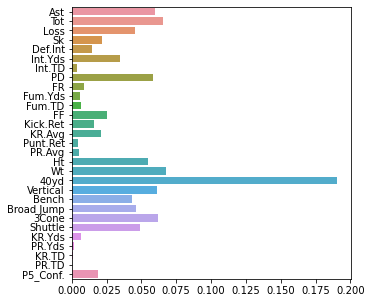

In [55]:
rfr = RandomForestRegressor(random_state=0)
pre_2020_dbs = dbs[dbs['Year']<2020]
dbs_2020 = dbs[dbs['Year']==2020]

X_train = pre_2020_dbs[dbs_col[8:]]
X_train.drop(['Year', 'AV/Yr'], axis=1, inplace=True)
y_train = pre_2020_dbs['Pick']
X_test = dbs_2020[dbs_col[8:]]
X_test.drop(['Year', 'AV/Yr'], axis=1, inplace=True)
y_test = dbs_2020['Pick']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

model = rfr.fit(X_train, y_train)

y_predict = model.predict(X_test)

mse = mean_squared_error(y_test, y_predict)

print('Mean Squared Error:', mse)

output = pd.DataFrame({'Id':X_test.index, 'Pick':y_predict})
output_2020_dbs = output.merge(dbs_info, how='left', left_on='Id', right_on=dbs_info.index)


display(output_2020_dbs.sort_values('Pick'))

plt.figure(figsize=(5, 5))
sns.barplot(model.feature_importances_, X_test.columns)


C:\Python\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Mean Squared Error: 4314.316881741944


,Id,Pick,Player,Pos,Year,AV/Yr
9,2671,53.000000,Anfernee Jennings,LB,2020,3.0
0,2592,66.570000,Isaiah Simmons,LB,2020,5.0
12,2686,67.880000,Alex Highsmith,LB,2020,4.0
7,2658,75.710000,Zack Baun,LB,2020,2.0
8,2668,77.600000,Terrell Lewis,LB,2020,1.0
1,2607,82.660000,Kenneth Murray,LB,2020,8.0
27,2803,90.020000,Carter Coughlin,LB,2020,2.0
10,2681,97.830000,Jacob Phillips,LB,2020,2.0
3,2612,101.300000,Patrick Queen,LB,2020,10.0
11,2682,108.370000,Malik Harrison,LB,2020,4.0


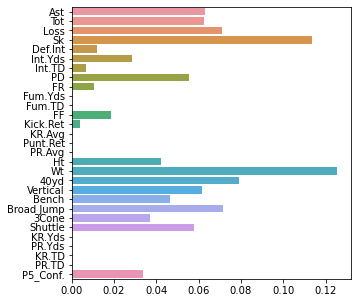

In [56]:
rfr = RandomForestRegressor(random_state=0)
pre_2020_lbs = lbs[lbs['Year']<2020]
lbs_2020 = lbs[lbs['Year']==2020]

X_train = pre_2020_lbs[lbs_col[8:]]
X_train.drop(['Year', 'AV/Yr'], axis=1, inplace=True)
y_train = pre_2020_lbs['Pick']
X_test = lbs_2020[lbs_col[8:]]
X_test.drop(['Year', 'AV/Yr'], axis=1, inplace=True)
y_test = lbs_2020['Pick']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

model = rfr.fit(X_train, y_train)

y_predict = model.predict(X_test)

mse = mean_squared_error(y_test, y_predict)

print('Mean Squared Error:', mse)

output = pd.DataFrame({'Id':X_test.index, 'Pick':y_predict})
output_2020_lbs = output.merge(lbs_info, how='left', left_on='Id', right_on=lbs_info.index)


display(output_2020_lbs.sort_values('Pick'))

plt.figure(figsize=(5, 5))
sns.barplot(model.feature_importances_, X_test.columns)


C:\Python\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Mean Squared Error: 5490.443539240852


,Id,Pick,Player,Pos,Year,AV/Yr
20,2714,64.470000,James Lynch,DT,2020,1.0
0,2586,70.300000,Chase Young,DE,2020,13.0
1,2591,71.370000,Derrick Brown,DT,2020,7.0
35,2810,73.980000,Kenny Willekes,DE,2020,NaN
26,2749,76.690000,Curtis Weaver,DE,2020,NaN
38,2818,81.050000,Casey Toohill,DE,2020,1.0
8,2638,89.830000,AJ Epenesa,DE,2020,2.0
16,2674,89.990000,Jonathan Greenard,DE,2020,1.0
2,2598,95.000000,Javon Kinlaw,DT,2020,7.0
33,2779,101.320000,Khalil Davis,DT,2020,0.0


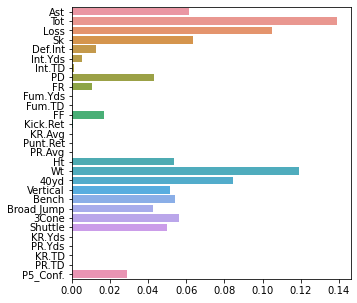

In [57]:
rfr = RandomForestRegressor(random_state=0)
pre_2020_dls = dls[dls['Year']<2020]
dls_2020 = dls[dls['Year']==2020]

X_train = pre_2020_dls[dls_col[8:]]
X_train.drop(['Year', 'AV/Yr'], axis=1, inplace=True)
y_train = pre_2020_dls['Pick']
X_test = dls_2020[dls_col[8:]]
X_test.drop(['Year', 'AV/Yr'], axis=1, inplace=True)
y_test = dls_2020['Pick']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

model = rfr.fit(X_train, y_train)

y_predict = model.predict(X_test)

mse = mean_squared_error(y_test, y_predict)

print('Mean Squared Error:', mse)

output = pd.DataFrame({'Id':X_test.index, 'Pick':y_predict})
output_2020_dls = output.merge(dls_info, how='left', left_on='Id', right_on=dls_info.index)


display(output_2020_dls.sort_values('Pick'))

plt.figure(figsize=(5, 5))
sns.barplot(model.feature_importances_, X_test.columns)


In [58]:
oline =  df[(df['Pos']=='T') | (df['Pos']=='G') | (df['Pos']=='C') | (df['Pos']=='OL')]

oline_info = oline[['Player', 'Pos', 'Year', 'AV/Yr']]

Mean Squared Error: 5405.549514223536


,Id,Pick,Player,Pos,Year,AV/Yr
8,2642,38.380000,Ezra Cleveland,T,2020,5.0
16,2692,46.762500,Saahdiq Charles,T,2020,0.0
27,2733,54.040000,Danny Pinter,G,2020,1.0
25,2729,75.880000,Jack Driscoll,G,2020,2.0
3,2597,76.895000,Tristan Wirfs,T,2020,11.0
40,2795,79.135000,Prince Tega Wanogho,T,2020,0.0
28,2734,82.520000,Shane Lemieux,G,2020,3.0
39,2794,84.600000,Simon Stepaniak,T,2020,NaN
4,2602,84.750000,Austin Jackson,T,2020,6.0
44,2835,88.377500,Tremayne Anchrum,G,2020,1.0


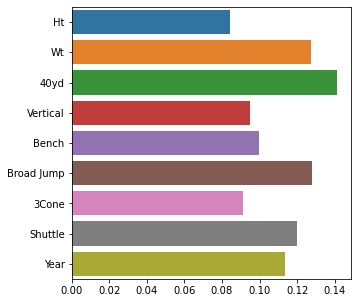

In [59]:
rfr = RandomForestRegressor(random_state=0)
pre_2020_oline = oline[oline['Year']<2020]
oline_2020 = oline[oline['Year']==2020]

X_train = pre_2020_oline[oline.columns[46:54].append(oline.columns[59:60])]
y_train = pre_2020_oline['Pick']
X_test = oline_2020[oline.columns[46:54].append(oline.columns[59:60])]
y_test = oline_2020['Pick']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

model = rfr.fit(X_train, y_train)

y_predict = model.predict(X_test)

mse = mean_squared_error(y_test, y_predict)

print('Mean Squared Error:', mse)

output = pd.DataFrame({'Id':X_test.index, 'Pick':y_predict})
output_2020_oline = output.merge(oline_info, how='left', left_on='Id', right_on=oline_info.index)


display(output_2020_oline.sort_values('Pick'))

plt.figure(figsize=(5, 5))
sns.barplot(model.feature_importances_, X_test.columns)

In [60]:
pff = pd.read_html('https://www.drafttek.com/2020-NFL-Draft-Big-Board/Top-NFL-Draft-Prospects-2020-Page-1.asp', skiprows=1)
pff1 = pd.read_html('https://www.drafttek.com/2020-NFL-Draft-Big-Board/Top-NFL-Draft-Prospects-2020-Page-2.asp', skiprows=1)
pff2 = pd.read_html('https://www.drafttek.com/2020-NFL-Draft-Big-Board/Top-NFL-Draft-Prospects-2020-Page-3.asp', skiprows=1)
bb1 = pff[0]
bb2 = pff1[0]
bb3 = pff2[0]

bb = pd.concat([bb1, bb2, bb3])

big_board = bb[[0, 2]]

d = {0:'Expert_Rank', 2:'Player'}
big_board = big_board.rename(mapper=d, axis=1)


In [61]:
overall_2020_output = pd.concat([output_2020_qbs, output_2020_wrs, output_2020_rbs, output_2020_tes, output_2020_dbs, output_2020_lbs, output_2020_dls, output_2020_oline])
overall_2020_output = overall_2020_output.merge(test_df, how='left', left_on='Player', right_on=test_df['Player'])
overall_2020_output.drop(['Id', 'Player_x', 'Player_y'], axis=1, inplace=True)
overall_2020_output['Pick_Ordinal'] = overall_2020_output['Pick'].rank(method='first')
overall_2020_output['Pick_Distance'] = overall_2020_output['Actual_Pick'] - overall_2020_output['Pick_Ordinal']
overall_2020_output.fillna(0, inplace=True)

overall_2020_output = overall_2020_output.merge(big_board, how='left', on='Player')
overall_2020_output['AV_Rank'] = overall_2020_output['AV/Yr'].rank(method='min', ascending=False)
display(overall_2020_output.sort_values('Pick').head(32))

MSE = np.square(np.subtract(overall_2020_output['Actual_Pick'], overall_2020_output['Pick'])).mean()
MSEoP = np.square(np.subtract(overall_2020_output['Actual_Pick'], overall_2020_output['Pick_Ordinal'])).mean()
MSEeR = np.square(np.subtract(overall_2020_output['Expert_Rank'], overall_2020_output['Pick_Ordinal'])).mean()
print('MSE:', MSE)
print('MSE Ordinal Pick:', MSEoP)
print('MSE Expert Rank:', MSEeR)

,Player,Pick,Pos,Year,AV/Yr,Actual_Pick,Pick_Ordinal,Pick_Distance,Expert_Rank,AV_Rank
0,Joe Burrow,-21.277336,QB,2020,7.0,1,1.0,0.0,2.0,12.0
2,Justin Herbert,30.441978,QB,2020,13.0,6,2.0,4.0,12.0,1.0
217,Ezra Cleveland,38.380000,T,2020,5.0,58,3.0,55.0,61.0,32.0
225,Saahdiq Charles,46.762500,T,2020,0.0,108,4.0,104.0,250.0,188.0
17,Justin Jefferson,52.390000,WR,2020,12.0,22,5.0,17.0,24.0,3.0
94,Kristian Fulton,52.710000,CB,2020,1.0,61,6.0,55.0,30.0,121.0
144,Anfernee Jennings,53.000000,LB,2020,3.0,87,7.0,80.0,122.0,65.0
236,Danny Pinter,54.040000,G,2020,1.0,149,8.0,141.0,NaN,121.0
28,Devin Duvernay,60.130000,WR,2020,4.0,92,9.0,83.0,107.0,48.0
61,Darrynton Evans,63.710000,RB,2020,1.0,93,10.0,83.0,154.0,121.0


MSE: 5014.467541658028
MSE Ordinal Pick: 7424.36862745098
MSE Expert Rank: 9211.95652173913


In [62]:
overall_2020_output.iloc[210] = overall_2020_output.iloc[210].fillna(16)
overall_2020_output.iloc[56] = overall_2020_output.iloc[56].fillna(54)
overall_2020_output.iloc[91] = overall_2020_output.iloc[91].fillna(32)
overall_2020_output.iloc[53] = overall_2020_output.iloc[53].fillna(29)
overall_2020_output.iloc[221] = overall_2020_output.iloc[221].fillna(45)
overall_2020_output.iloc[122] = overall_2020_output.iloc[122].fillna(454)

In [63]:
av_ranks = overall_2020_output.sort_values('AV_Rank').head(32)
display(av_ranks)
pred_count = av_ranks[av_ranks['Pick_Ordinal']<= 32]
exp_count = av_ranks[av_ranks['Expert_Rank']<= 32]

print('Good Value Model Picks:', pred_count['Player'].count())
print('Good Value Expert Picks:', exp_count['Player'].count())

model_better = av_ranks[(av_ranks['Pick_Ordinal'] <= 32) & (av_ranks['Expert_Rank'] > 32)]
exp_better = av_ranks[(av_ranks['Pick_Ordinal'] > 32) & (av_ranks['Expert_Rank'] <= 32)]

display(model_better)
display(exp_better)

,Player,Pick,Pos,Year,AV/Yr,Actual_Pick,Pick_Ordinal,Pick_Distance,Expert_Rank,AV_Rank
2,Justin Herbert,30.441978,QB,2020,13.0,6,2.0,4.0,12.0,1.0
168,Chase Young,70.300000,DE,2020,13.0,2,14.0,-12.0,1.0,1.0
17,Justin Jefferson,52.390000,WR,2020,12.0,22,5.0,17.0,24.0,3.0
212,Tristan Wirfs,76.895000,T,2020,11.0,13,23.0,-10.0,7.0,4.0
138,Patrick Queen,101.300000,LB,2020,10.0,28,64.0,-36.0,21.0,5.0
54,Jonathan Taylor,80.420000,RB,2020,10.0,41,28.0,13.0,41.0,5.0
136,Kenneth Murray,82.660000,LB,2020,8.0,23,34.0,-11.0,26.0,7.0
218,Damien Lewis,90.390000,G,2020,8.0,69,46.0,23.0,68.0,7.0
52,Clyde Edwards-Helaire,166.616667,RB,2020,8.0,32,226.0,-194.0,98.0,7.0
210,Jedrick Wills Jr,199.548810,T,2020,8.0,10,250.0,-240.0,16.0,7.0


Good Value Model Picks: 10
Good Value Expert Picks: 16


,Player,Pick,Pos,Year,AV/Yr,Actual_Pick,Pick_Ordinal,Pick_Distance,Expert_Rank,AV_Rank
54,Jonathan Taylor,80.42,RB,2020,10.0,41,28.0,13.0,41.0,5.0
56,JK Dobbins,77.26,RB,2020,7.0,55,24.0,31.0,54.0,12.0
23,Chase Claypool,81.29,WR,2020,7.0,49,30.0,19.0,81.0,12.0


,Player,Pick,Pos,Year,AV/Yr,Actual_Pick,Pick_Ordinal,Pick_Distance,Expert_Rank,AV_Rank
138,Patrick Queen,101.300000,LB,2020,10.0,28,64.0,-36.0,21.0,5.0
136,Kenneth Murray,82.660000,LB,2020,8.0,23,34.0,-11.0,26.0,7.0
210,Jedrick Wills Jr,199.548810,T,2020,8.0,10,250.0,-240.0,16.0,7.0
15,CeeDee Lamb,85.770000,WR,2020,8.0,17,38.0,-21.0,9.0,7.0
91,Antoine Winfield Jr,151.006364,S,2020,7.0,45,200.0,-155.0,32.0,12.0
170,Javon Kinlaw,95.000000,DT,2020,7.0,14,49.0,-35.0,8.0,12.0
53,DAndre Swift,134.150000,RB,2020,6.0,35,155.0,-120.0,29.0,21.0
14,Jerry Jeudy,124.120000,WR,2020,6.0,15,127.0,-112.0,10.0,21.0
209,Andrew Thomas,117.260500,T,2020,6.0,4,109.0,-105.0,13.0,21.0


Text(0.5, 1.0, 'Actual 1st Round Positions')

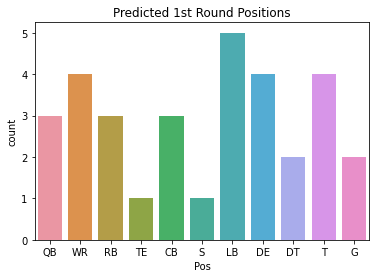

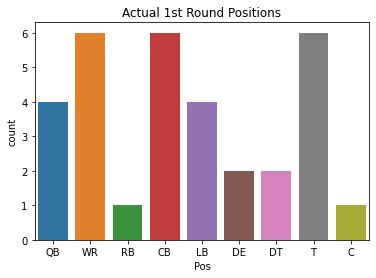

In [64]:
overall_2020_output.loc[overall_2020_output['Pick_Ordinal']<=32.0, 'Round1_Pred'] = 1
overall_2020_output.loc[overall_2020_output['Pick_Ordinal'] > 32.0, 'Round1_Pred'] = 0
overall_2020_output.loc[overall_2020_output['Actual_Pick']<=32.0, 'Round1_True'] = 1
overall_2020_output.loc[overall_2020_output['Actual_Pick'] > 32.0, 'Round1_True'] = 0

round1_pred = overall_2020_output[overall_2020_output['Round1_Pred']==1]
round1_true = overall_2020_output[overall_2020_output['Round1_True']==1]

sns.countplot(x='Pos', data=round1_pred)
plt.title('Predicted 1st Round Positions')

plt.figure()
sns.countplot(x='Pos', data=round1_true)
plt.title('Actual 1st Round Positions')

In [65]:
u_valued = overall_2020_output.sort_values('Pick_Distance', ascending=False).head(15)
o_valued = overall_2020_output.sort_values('Pick_Distance', ascending=True).head(15)

print('Absolute Average Pick Distance:', np.abs(overall_2020_output['Pick_Distance']).mean())
print('Absolute Average Pick Distance, 1st Rnd Only:', np.abs(round1_pred['Pick_Distance']).mean())
print('Analyst Mock Absolute APD, 1st Rnd:', np.mean([4, 9, 1, 2, 6, 6, 3, 2, 8, 2, 4, 19, 4, 7, 2, 2, 10, 1, 1, 25, 46, 6, 9, 13, 16, 9]))
display(u_valued)
display(o_valued)

Absolute Average Pick Distance: 68.61176470588235
Absolute Average Pick Distance, 1st Rnd Only: 77.0625
Analyst Mock Absolute APD, 1st Rnd: 8.346153846153847


,Player,Pick,Pos,Year,AV/Yr,Actual_Pick,Pick_Ordinal,Pick_Distance,Expert_Rank,AV_Rank,Round1_Pred,Round1_True
253,Tremayne Anchrum,88.377500,G,2020,1.0,250,40.0,210.0,NaN,121.0,0.0,0.0
203,Kenny Willekes,73.980000,DE,2020,0.0,225,16.0,209.0,189.0,188.0,1.0,0.0
206,Casey Toohill,81.050000,DE,2020,1.0,233,29.0,204.0,201.0,121.0,1.0,0.0
9,Cole McDonald,81.925129,QB,2020,0.0,224,32.0,192.0,175.0,188.0,1.0,0.0
249,Prince Tega Wanogho,79.135000,T,2020,0.0,210,26.0,184.0,108.0,188.0,1.0,0.0
162,Carter Coughlin,90.020000,LB,2020,2.0,218,45.0,173.0,207.0,84.0,0.0,0.0
248,Simon Stepaniak,84.600000,T,2020,0.0,209,36.0,173.0,NaN,188.0,0.0,0.0
194,Curtis Weaver,76.690000,DE,2020,0.0,164,22.0,142.0,66.0,188.0,1.0,0.0
236,Danny Pinter,54.040000,G,2020,1.0,149,8.0,141.0,NaN,121.0,1.0,0.0
204,James Smith-Williams,113.500000,DE,2020,1.0,229,93.0,136.0,223.0,121.0,0.0,0.0


,Player,Pick,Pos,Year,AV/Yr,Actual_Pick,Pick_Ordinal,Pick_Distance,Expert_Rank,AV_Rank,Round1_Pred,Round1_True
210,Jedrick Wills Jr,199.548810,T,2020,8.0,10,250.0,-240.0,16.0,7.0,0.0,1.0
83,CJ Henderson,189.950000,CB,2020,3.0,9,248.0,-239.0,NaN,65.0,0.0,1.0
84,AJ Terrell,185.469364,CB,2020,5.0,16,241.0,-225.0,NaN,32.0,0.0,1.0
52,Clyde Edwards-Helaire,166.616667,RB,2020,8.0,32,226.0,-194.0,98.0,7.0,0.0,1.0
140,Willie Gay Jr,192.850000,LB,2020,4.0,63,249.0,-186.0,NaN,48.0,0.0,0.0
59,KeShawn Vaughn,223.103499,RB,2020,1.0,76,255.0,-179.0,NaN,121.0,0.0,0.0
178,Julian Okwara,179.440000,DE,2020,0.0,67,240.0,-173.0,76.0,188.0,0.0,0.0
216,Robert Hunt,154.589167,G,2020,6.0,39,209.0,-170.0,80.0,21.0,0.0,0.0
221,Lloyd Cushenberry III,188.860000,C,2020,6.0,83,246.0,-163.0,45.0,21.0,0.0,0.0
219,Jonah Jackson,170.127000,G,2020,7.0,75,231.0,-156.0,97.0,12.0,0.0,0.0


Based on MSE, this model seems a bit more accurate overall. However, I think these tables of the top 15 most over and undervalued players based on the model shows a clear correlation between player weight and their perceived value by the model. 13 of the 15 most undervalued players are in what I would consider heavy positions (O-line, D-line, or LB), while only 5 of these appear in the overvalued table. DBs and WRs make up six more spots on the table, and they are the lightest position groups. The remaing 4 spots go to three RBs and one QB, which are both on the lighter side, but heavier than CBs, safeties, and WRs. 

Based on absolute average pick distance, my model is clearly inferior to NFL Draft Experts at predicting the frist round of the draft. This is probably a good thing, for them. Of course, the biggest factor that gives them an advantage over my model, is that they have access to the film on all these players, while my model does not. Film is a major factor in draft position as it tells NFL coaches a lot more about a player's actual abilites than stats and combine results can. Stats especially can be heavily influenced by a player's offensive scheme, how tough their schedule is, or a freak injury. I do believe that combine stats normalize this impact a little, but it still greatly affects the model. 

There are a couple other differences that give NFL analysts an advantage as well. For one, they know the order of the teams in the draft, and can combine both draft approaches of taking the best player available, and fitting a need of the team. In this respect, my model is probably a lot more useful for just predicting the best player available, not necessarily draft order. Analysts also have multiple sources from each team that can give them incredibly detailed analyses of what each team is thinking heading into the draft. And finally, some of these analysts' mock drafts may have a small influence over the draft itself. Although most teams rely on their own draft board to value their own players, it can be hard for them to figure out how other teams value players, and they may jump the gun on certain players if they have been ranked highly in mock drafts to make sure other teams don't get a chance to get them.

The one advantage I have is that I'm looking solely at a pool of drafted players. This may not make a huge difference in the first round, but in later rounds there is much less difference between a player that gets drafted and one that becomes an undrafted free agent. Analysts may have a hard time discerning between the two groups while my model, when looking backwards, doesn't have to. As a result, I think my later rounds may be more accurate, though I will have to check that. Of course, if I use this to predict the 2021 NFL draft, I will run into similar problems.

In [66]:
print(round1_pred['AV/Yr'].sum())
print(round1_true['AV/Yr'].sum())

128.0
188.0


In [67]:
output_2020.drop('Pick_Distance', inplace=True, axis=1)

In [68]:
output_2020 = output_2020.merge(test_df, how='left', left_on='Player', right_on=test_df['Player'])
output_2020.drop(['Player_x', 'Player_y'], axis=1, inplace=True) #'Id'
output_2020['Pick_Ordinal'] = output_2020['Pick'].rank(method='first')
output_2020['Pick_Distance'] = output_2020['Actual_Pick'] - output_2020['Pick_Ordinal']
output_2020.fillna(0, inplace=True)

output_2020 = output_2020.merge(big_board, how='left', on='Player')
output_2020['AV_Rank'] = output_2020['AV/Yr'].rank(method='min', ascending=False)
display(output_2020.sort_values('Pick').head(32))

MSE = np.square(np.subtract(output_2020['Actual_Pick'], output_2020['Pick'])).mean()
MSEoP = np.square(np.subtract(output_2020['Actual_Pick'], output_2020['Pick_Ordinal'])).mean()
MSEeR = np.square(np.subtract(output_2020['Expert_Rank'], output_2020['Pick_Ordinal'])).mean()
print('MSE:', MSE)
print('MSE Ordinal Pick:', MSEoP)
print('MSE Expert Rank:', MSEeR)

,Player,Id,Pick,Pos,Year,AV/Yr,Pick_Ordinal,Actual_Pick,Pick_Distance,Expert_Rank,AV_Rank
4,Joe Burrow,2585,18.395242,QB,2020,7.0,1.0,1,0.0,2.0,12.0
82,Lynn Bowden Jr,2664,40.098713,WR,2020,2.0,2.0,80,78.0,NaN,84.0
16,Tristan Wirfs,2597,51.631239,T,2020,11.0,3.0,13,10.0,7.0,4.0
9,Justin Herbert,2590,52.429887,QB,2020,13.0,4.0,6,2.0,12.0,1.0
11,Isaiah Simmons,2592,57.991545,LB,2020,5.0,5.0,8,3.0,3.0,32.0
28,Brandon Aiyuk,2609,59.455434,WR,2020,6.0,6.0,25,19.0,51.0,21.0
25,Justin Jefferson,2606,63.881299,WR,2020,12.0,7.0,22,15.0,24.0,3.0
5,Chase Young,2586,65.107244,DE,2020,13.0,8.0,2,-6.0,1.0,1.0
14,Mekhi Becton,2595,67.052976,T,2020,5.0,9.0,11,2.0,11.0,32.0
132,James Lynch,2714,67.179784,DT,2020,1.0,10.0,130,120.0,55.0,121.0


MSE: 4434.732078919347
MSE Ordinal Pick: 6304.619607843138
MSE Expert Rank: 8063.152173913043


In [69]:
output_2020.iloc[13] = output_2020.iloc[13].fillna(16)
output_2020.iloc[58] = output_2020.iloc[58].fillna(54)
output_2020.iloc[48] = output_2020.iloc[48].fillna(32)
output_2020.iloc[38] = output_2020.iloc[38].fillna(29)
output_2020.iloc[85] = output_2020.iloc[85].fillna(45)

In [70]:
av_ranks = output_2020.sort_values('AV_Rank').head(32)
display(av_ranks)
pred_count = av_ranks[av_ranks['Pick_Ordinal']<= 32]
exp_count = av_ranks[av_ranks['Expert_Rank']<= 32]

print('Good Value Model Picks:', pred_count['Player'].count())
print('Good Value Expert Picks:', exp_count['Player'].count())

model_better = av_ranks[(av_ranks['Pick_Ordinal'] <= 32) & (av_ranks['Expert_Rank'] > 32)]
exp_better = av_ranks[(av_ranks['Pick_Ordinal'] > 32) & (av_ranks['Expert_Rank'] <= 32)]

display(model_better)
display(exp_better)

,Player,Id,Pick,Pos,Year,AV/Yr,Pick_Ordinal,Actual_Pick,Pick_Distance,Expert_Rank,AV_Rank
5,Chase Young,2586,65.107244,DE,2020,13.0,8.0,2,-6.0,1.0,1.0
9,Justin Herbert,2590,52.429887,QB,2020,13.0,4.0,6,2.0,12.0,1.0
25,Justin Jefferson,2606,63.881299,WR,2020,12.0,7.0,22,15.0,24.0,3.0
16,Tristan Wirfs,2597,51.631239,T,2020,11.0,3.0,13,10.0,7.0,4.0
31,Patrick Queen,2612,119.726947,LB,2020,10.0,118.0,28,-90.0,21.0,5.0
44,Jonathan Taylor,2625,70.394481,RB,2020,10.0,11.0,41,30.0,41.0,5.0
35,Clyde Edwards-Helaire,2616,167.476933,RB,2020,8.0,248.0,32,-216.0,98.0,7.0
26,Kenneth Murray,2607,92.037574,LB,2020,8.0,32.0,23,-9.0,26.0,7.0
20,CeeDee Lamb,2601,97.967066,WR,2020,8.0,46.0,17,-29.0,9.0,7.0
72,Damien Lewis,2653,105.054709,G,2020,8.0,67.0,69,2.0,68.0,7.0


Good Value Model Picks: 13
Good Value Expert Picks: 16


,Player,Id,Pick,Pos,Year,AV/Yr,Pick_Ordinal,Actual_Pick,Pick_Distance,Expert_Rank,AV_Rank
44,Jonathan Taylor,2625,70.394481,RB,2020,10.0,11.0,41,30.0,41.0,5.0
58,JK Dobbins,2639,85.791264,RB,2020,7.0,20.0,55,35.0,54.0,12.0
52,Chase Claypool,2633,70.742185,WR,2020,7.0,12.0,49,37.0,81.0,12.0
28,Brandon Aiyuk,2609,59.455434,WR,2020,6.0,6.0,25,19.0,51.0,21.0
21,Austin Jackson,2602,77.420711,T,2020,6.0,13.0,18,5.0,37.0,21.0


,Player,Id,Pick,Pos,Year,AV/Yr,Pick_Ordinal,Actual_Pick,Pick_Distance,Expert_Rank,AV_Rank
31,Patrick Queen,2612,119.726947,LB,2020,10.0,118.0,28,-90.0,21.0,5.0
20,CeeDee Lamb,2601,97.967066,WR,2020,8.0,46.0,17,-29.0,9.0,7.0
13,Jedrick Wills Jr,2594,109.883405,T,2020,8.0,83.0,10,-73.0,16.0,7.0
17,Javon Kinlaw,2598,97.249379,DT,2020,7.0,39.0,14,-25.0,8.0,12.0
48,Antoine Winfield Jr,2629,122.355712,S,2020,7.0,126.0,45,-81.0,32.0,12.0
18,Jerry Jeudy,2599,121.586956,WR,2020,6.0,125.0,15,-110.0,10.0,21.0
7,Andrew Thomas,2588,101.358492,T,2020,6.0,53.0,4,-49.0,13.0,21.0
38,DAndre Swift,2619,150.194954,RB,2020,6.0,224.0,35,-189.0,29.0,21.0
